In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from judgemark_v2lp.utils.file_io import load_json_file, save_json_file
from judgemark_v2lp.benchmark import sanitize_model_name, finalize_scores_and_compute_judgemark
import uuid
from tqdm import tqdm


In [3]:
run_id=None

samples_file = "../data/judgemark_v2.1_samples.json"
samples_data = load_json_file(samples_file)
json_file = "../outputs/my_judgemark_runs2.json"
runs = load_json_file(json_file)
print(f"Run id's {runs.keys()} from {json_file}")
run_id = list(runs.keys())[-2]

run_id= '5605a8be-4de3-4596-b4ed-f64dc91dedbb__deepseek_deepseek-r1'

_, judge_model = run_id.split("__")
judge_model

Run id's dict_keys(['705a977b-fe50-4733-b1ce-b1d69680587f__deepseek_deepseek-chat-v3-0324', '5150410f-68c1-4485-9e23-c918e53242cd__qwen_qwen3-235b-a22b', 'c8f469f4-fa1c-45db-a027-6a5defb45fd1__qwen_qwen3-235b-a22b', '234946e7-05ef-41a3-a223-53415c7dd2bf__deepseek-ai_deepseek-r1', '0090ab50-24dd-4e8d-b81f-52c4ad557773__deepseek_deepseek-r1', '5605a8be-4de3-4596-b4ed-f64dc91dedbb__deepseek_deepseek-r1', 'f17704e4-881c-4a5a-b899-baa0fd55af9f__deepseek_deepseek-r1']) from ../outputs/my_judgemark_runs2.json


'deepseek_deepseek-r1'

In [4]:
from loguru import logger
import sys
logger.remove()
logger.add(sys.stderr, level="INFO", format="{message}")

import os
os.chdir("../")

In [5]:
run = runs[run_id]
judge_model = run['judge_model']
run.keys()

judge_model, run_id

('deepseek/deepseek-r1',
 '5605a8be-4de3-4596-b4ed-f64dc91dedbb__deepseek_deepseek-r1')

In [6]:
from judgemark_v2lp.scoring import compute_ranked_score, compute_raw_score, compute_weighted_score
import numpy as np
from tqdm.auto import tqdm



results = {
    "published": {
        "judgemark_score_calib": 0.761,
        "stability_calib": 0.894,
        "separability_calib": 0.691,
        "human_correlation_calib": 0.908,
    }
}

## Normal ranked




--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.688
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
4.711
CI99 Overlap pct: 
0.405
Avg. |Cohen's d| for adjacent pairs: 0.317
Average EMD across all pairs: 1.325
Avg. CI95 half-width: 0.138 (modulated: 0.838)




--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.688
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
8.115
CI99 Overlap pct: 
0.411
Avg. |Cohen's d| for adjacent pairs: 0.310
Average EMD across all pairs: 2.200
Avg. CI95 half-width: 0.225 (modulated: 0.602)



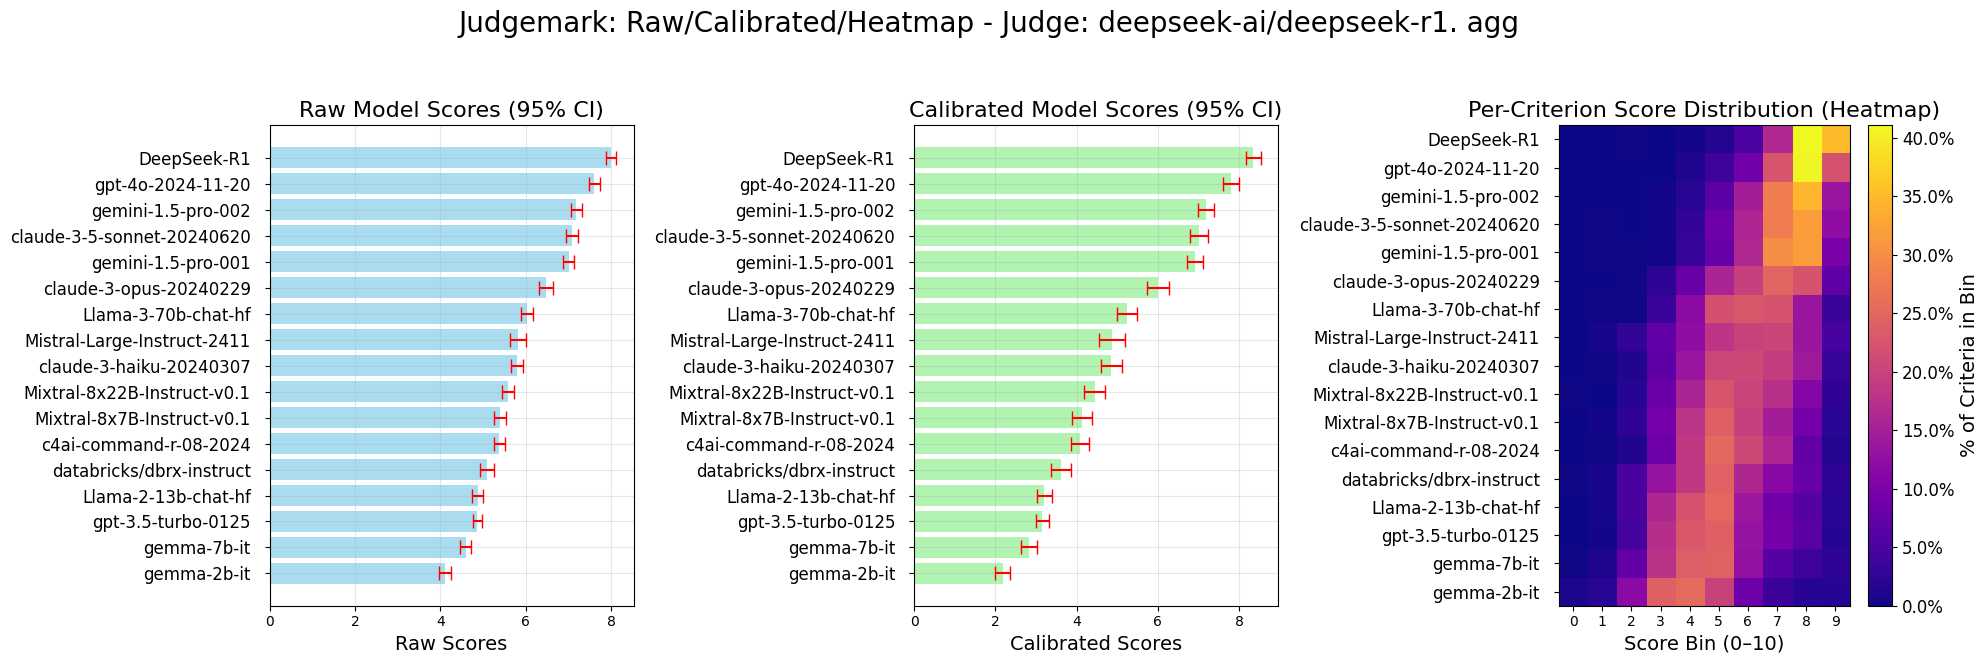

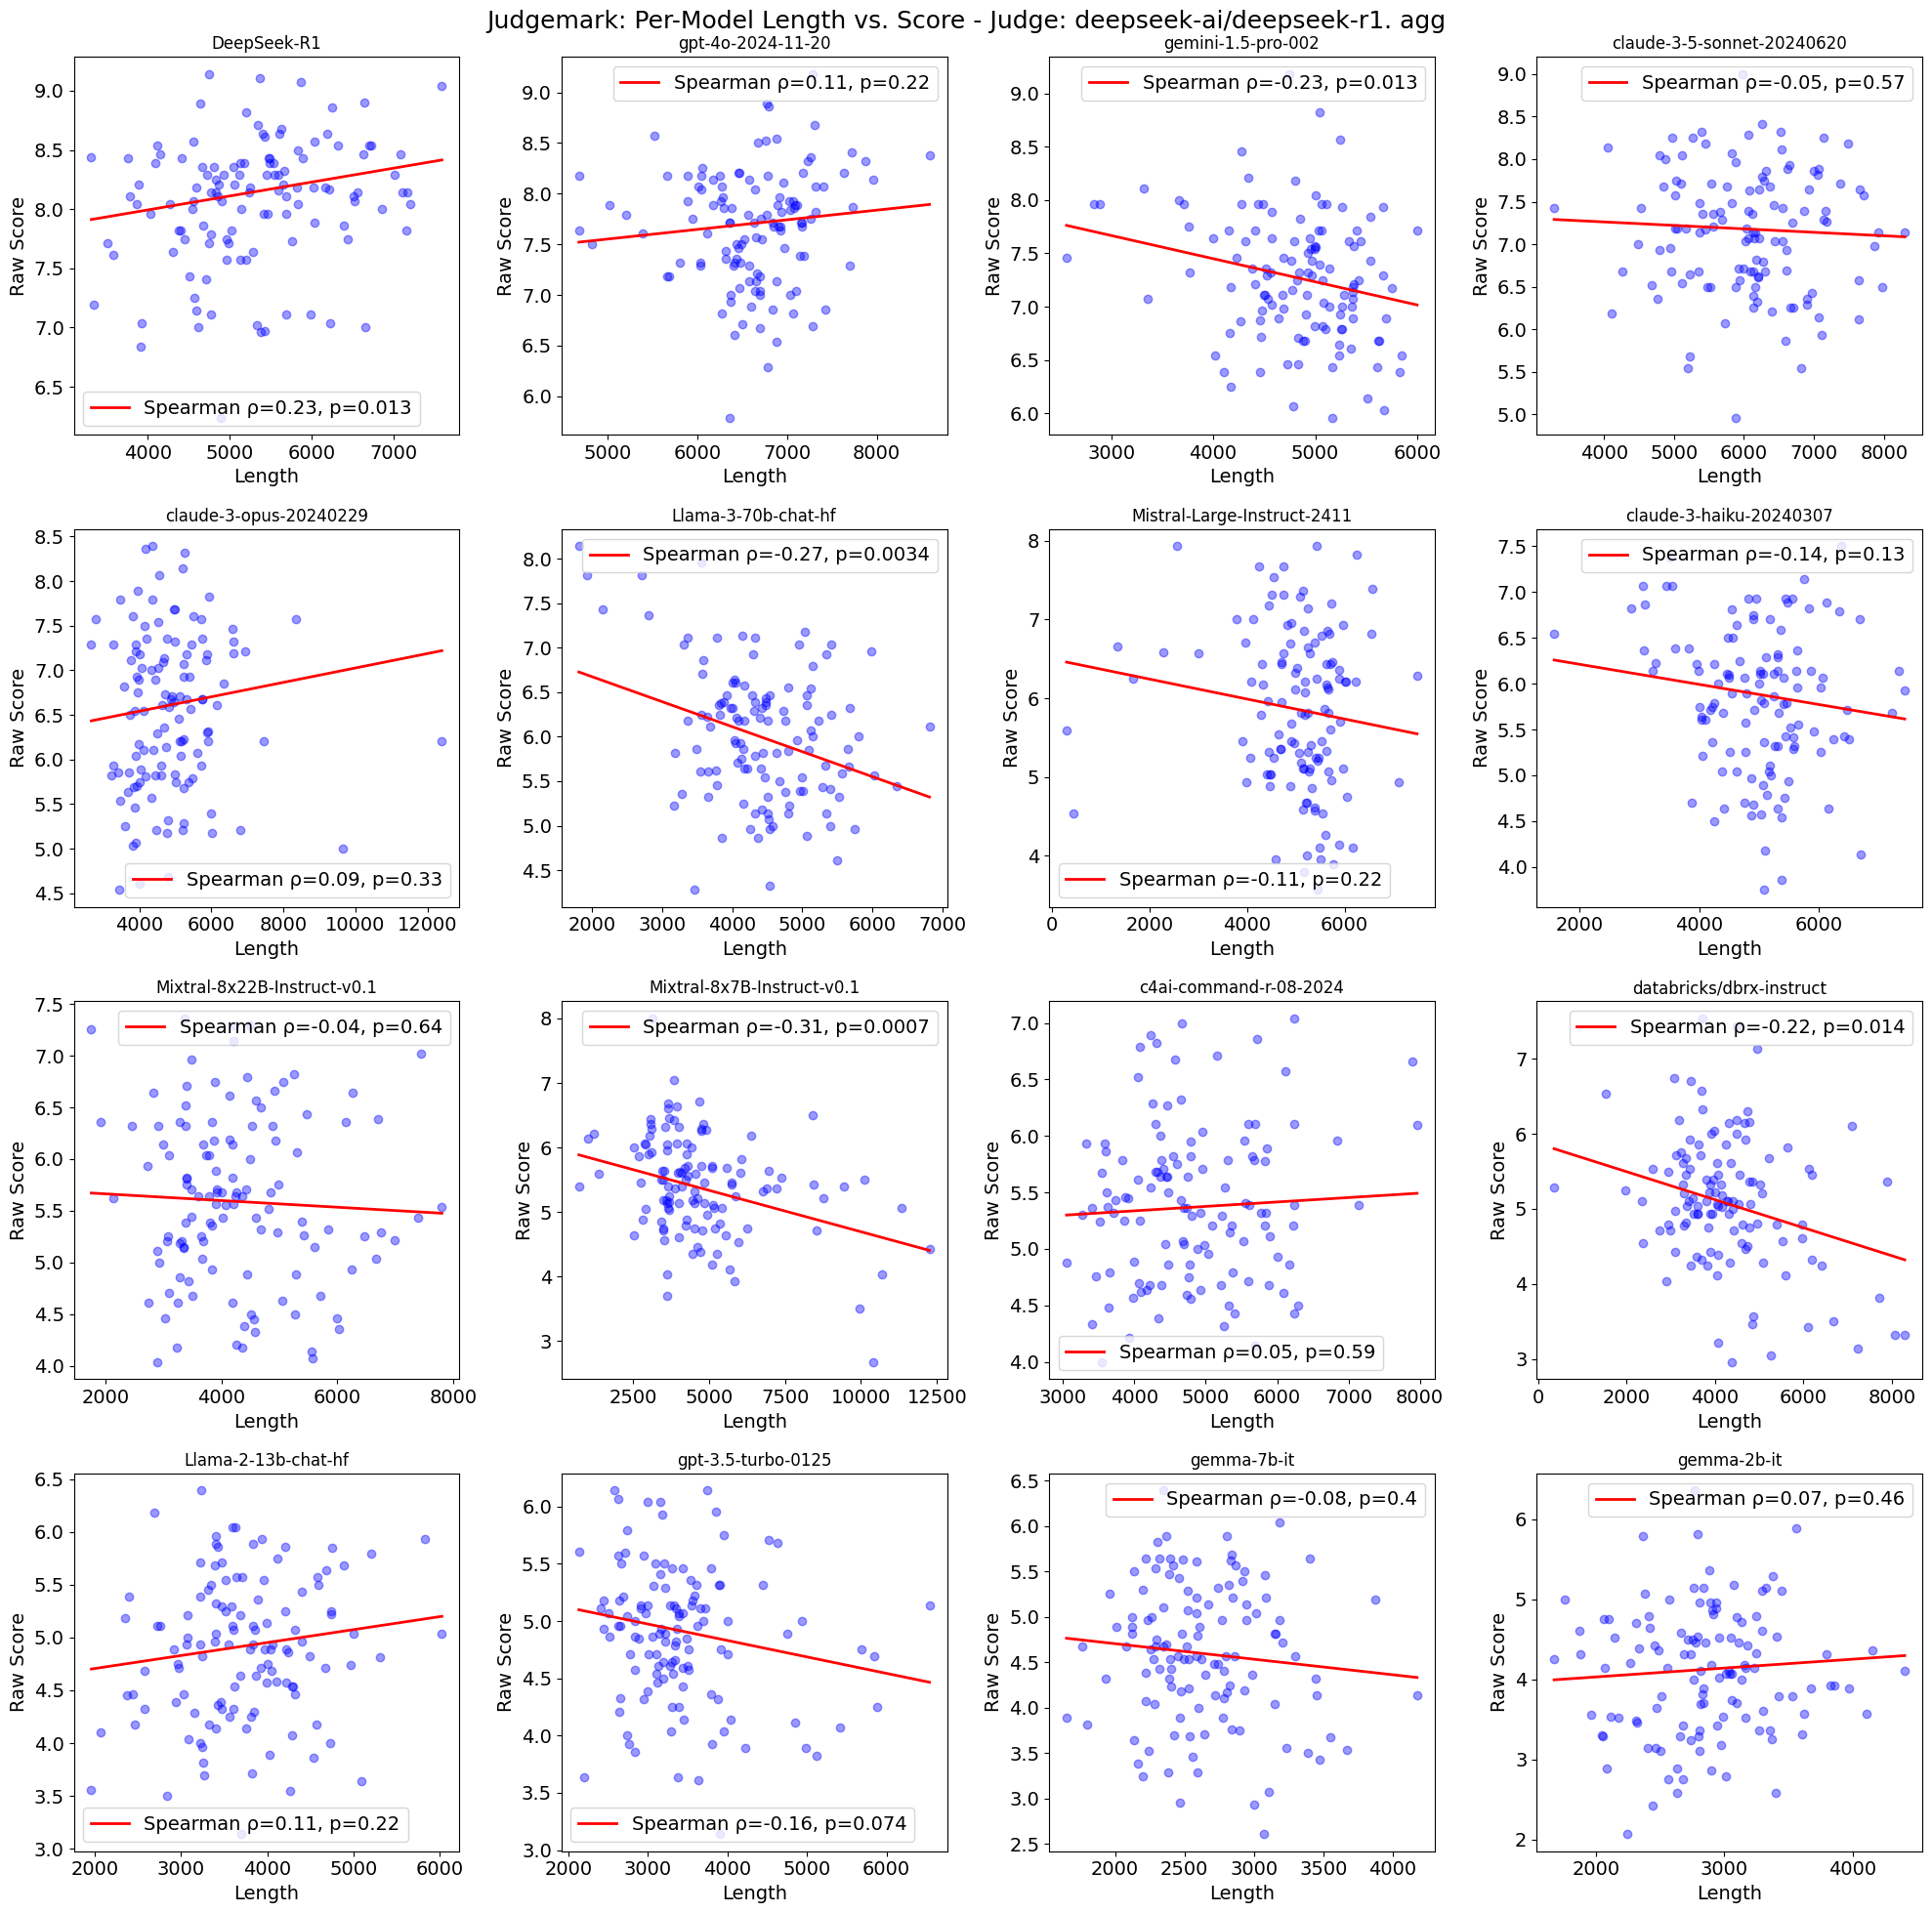




------- RAW SCORES Summary -------
ANOVA F-value: 252.7273, p=0.0000
Kruskal-Wallis: 1343.4650, p=0.0000
Pearson r=0.9656
Kendall τ=0.8941
Std.Dev across models: 1.0915

Model Scores:
DeepSeek-R1............................. 7.995 ±0.121
gpt-4o-2024-11-20....................... 7.601 ±0.124
gemini-1.5-pro-002...................... 7.183 ±0.130
claude-3-5-sonnet-20240620.............. 7.082 ±0.143
gemini-1.5-pro-001...................... 7.002 ±0.126
claude-3-opus-20240229.................. 6.471 ±0.164
Llama-3-70b-chat-hf..................... 6.019 ±0.139
Mistral-Large-Instruct-2411............. 5.814 ±0.184
claude-3-haiku-20240307................. 5.792 ±0.142
Mixtral-8x22B-Instruct-v0.1............. 5.577 ±0.144
Mixtral-8x7B-Instruct-v0.1.............. 5.395 ±0.141
c4ai-command-r-08-2024.................. 5.381 ±0.122
databricks/dbrx-instruct................ 5.091 ±0.156
Llama-2-13b-chat-hf..................... 4.869 ±0.119
gpt-3.5-turbo-0125...................... 4.863 ±0.107
gem

In [7]:
results['weighted'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_weighted", do_plot=1)




--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.688
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
4.281
CI99 Overlap pct: 
0.402
Avg. |Cohen's d| for adjacent pairs: 0.345
Average EMD across all pairs: 1.354
Avg. CI95 half-width: 0.131 (modulated: 0.858)




--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.688
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
7.300
CI99 Overlap pct: 
0.408
Avg. |Cohen's d| for adjacent pairs: 0.344
Average EMD across all pairs: 2.243
Avg. CI95 half-width: 0.212 (modulated: 0.641)



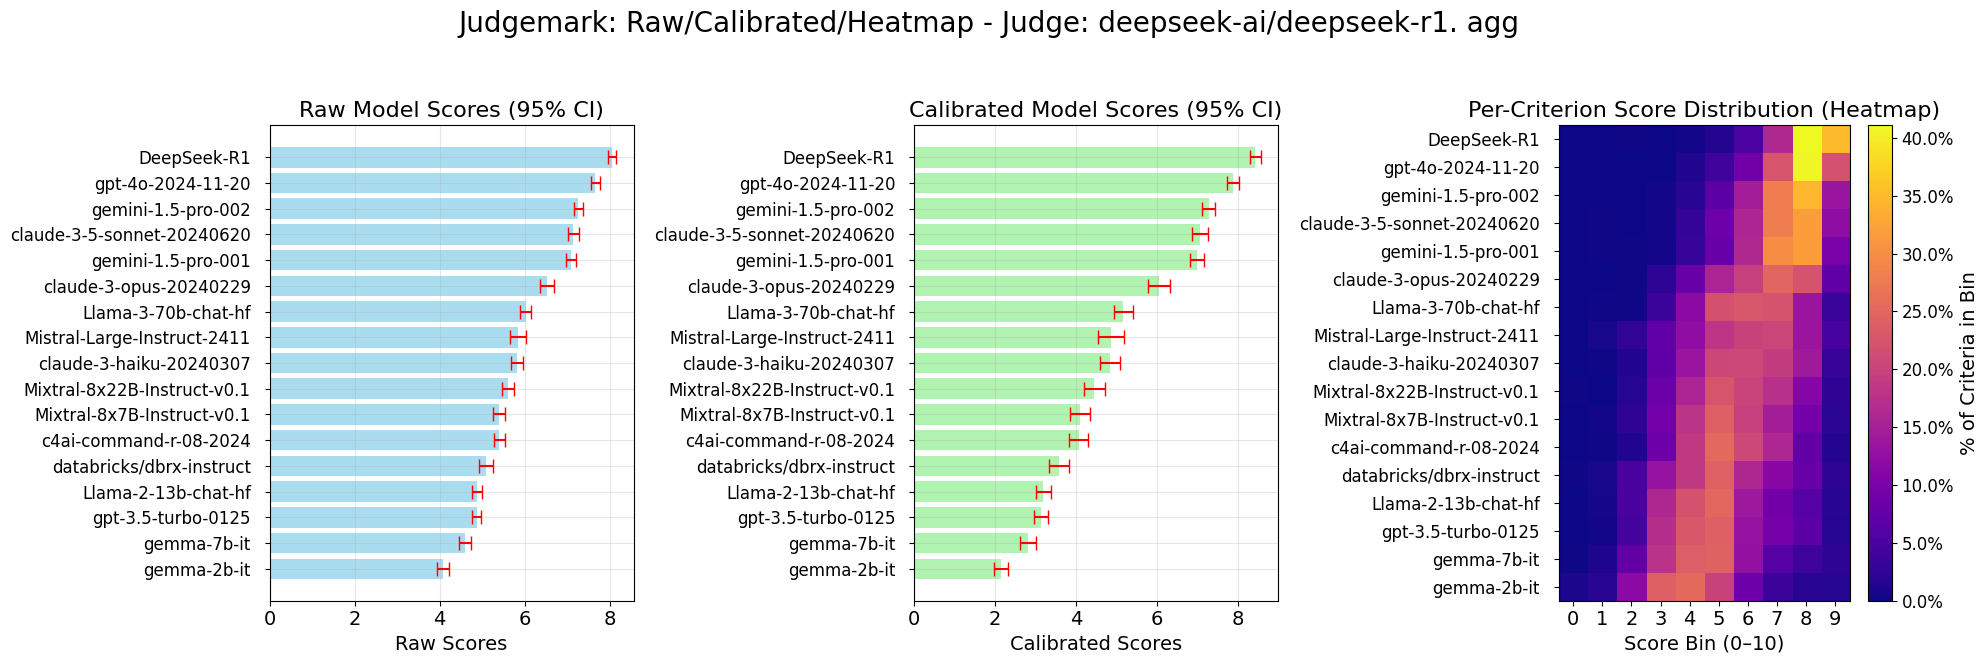

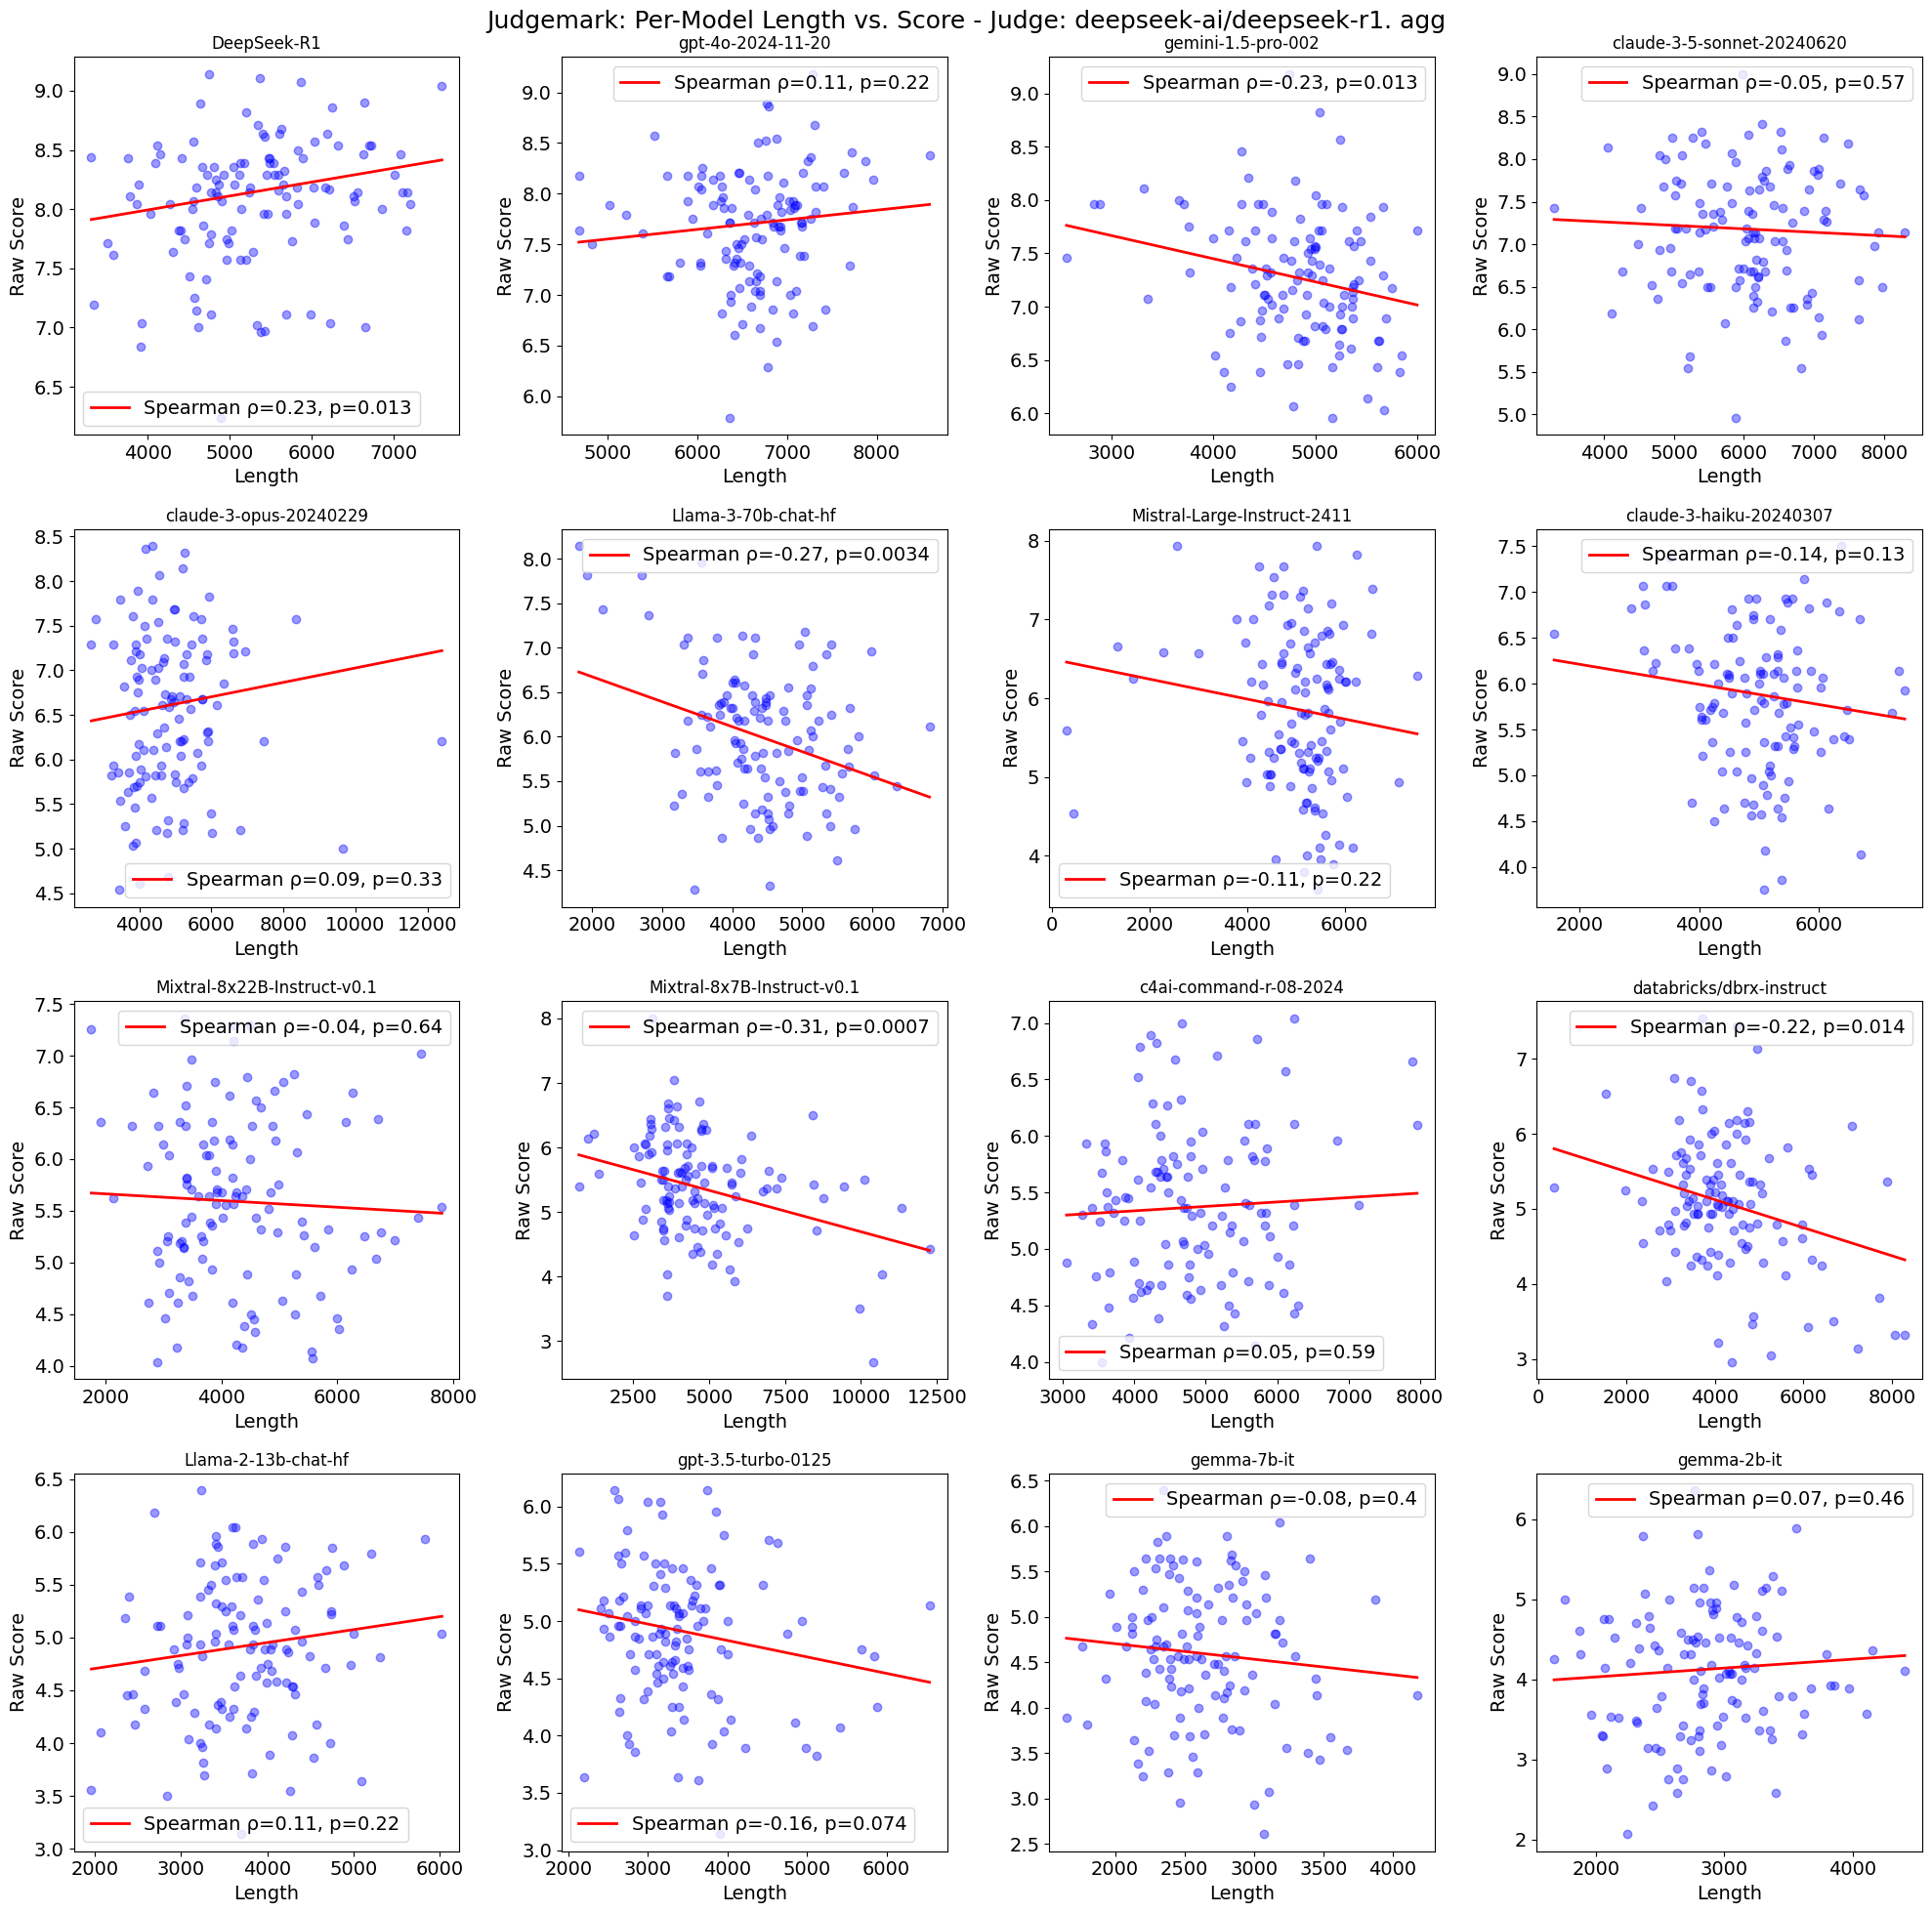




------- RAW SCORES Summary -------
ANOVA F-value: 287.1970, p=0.0000
Kruskal-Wallis: 1409.9459, p=0.0000
Pearson r=0.9657
Kendall τ=0.8971
Std.Dev across models: 1.1164

Model Scores:
DeepSeek-R1............................. 8.058 ±0.096
gpt-4o-2024-11-20....................... 7.667 ±0.102
gemini-1.5-pro-002...................... 7.265 ±0.105
claude-3-5-sonnet-20240620.............. 7.142 ±0.129
gemini-1.5-pro-001...................... 7.085 ±0.113
claude-3-opus-20240229.................. 6.526 ±0.158
Llama-3-70b-chat-hf..................... 6.021 ±0.135
Mistral-Large-Instruct-2411............. 5.846 ±0.182
claude-3-haiku-20240307................. 5.819 ±0.141
Mixtral-8x22B-Instruct-v0.1............. 5.610 ±0.145
Mixtral-8x7B-Instruct-v0.1.............. 5.407 ±0.139
c4ai-command-r-08-2024.................. 5.407 ±0.122
databricks/dbrx-instruct................ 5.096 ±0.158
Llama-2-13b-chat-hf..................... 4.884 ±0.120
gpt-3.5-turbo-0125...................... 4.877 ±0.107
gem

In [8]:
# sanitized_jm = sanitize_model_name(judge_model)
# base_id = run_id if run_id else str(uuid.uuid4())
# run_key = f"{base_id}__{sanitized_jm}"
# Compute final stats
results['raw'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_raw", do_plot=1)




--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.750
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
4.983
CI99 Overlap pct: 
0.392
Avg. |Cohen's d| for adjacent pairs: 0.318
Average EMD across all pairs: 1.435
Avg. CI95 half-width: 0.143 (modulated: 0.824)




--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.750
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
8.186
CI99 Overlap pct: 
0.389
Avg. |Cohen's d| for adjacent pairs: 0.322
Average EMD across all pairs: 2.396
Avg. CI95 half-width: 0.233 (modulated: 0.582)



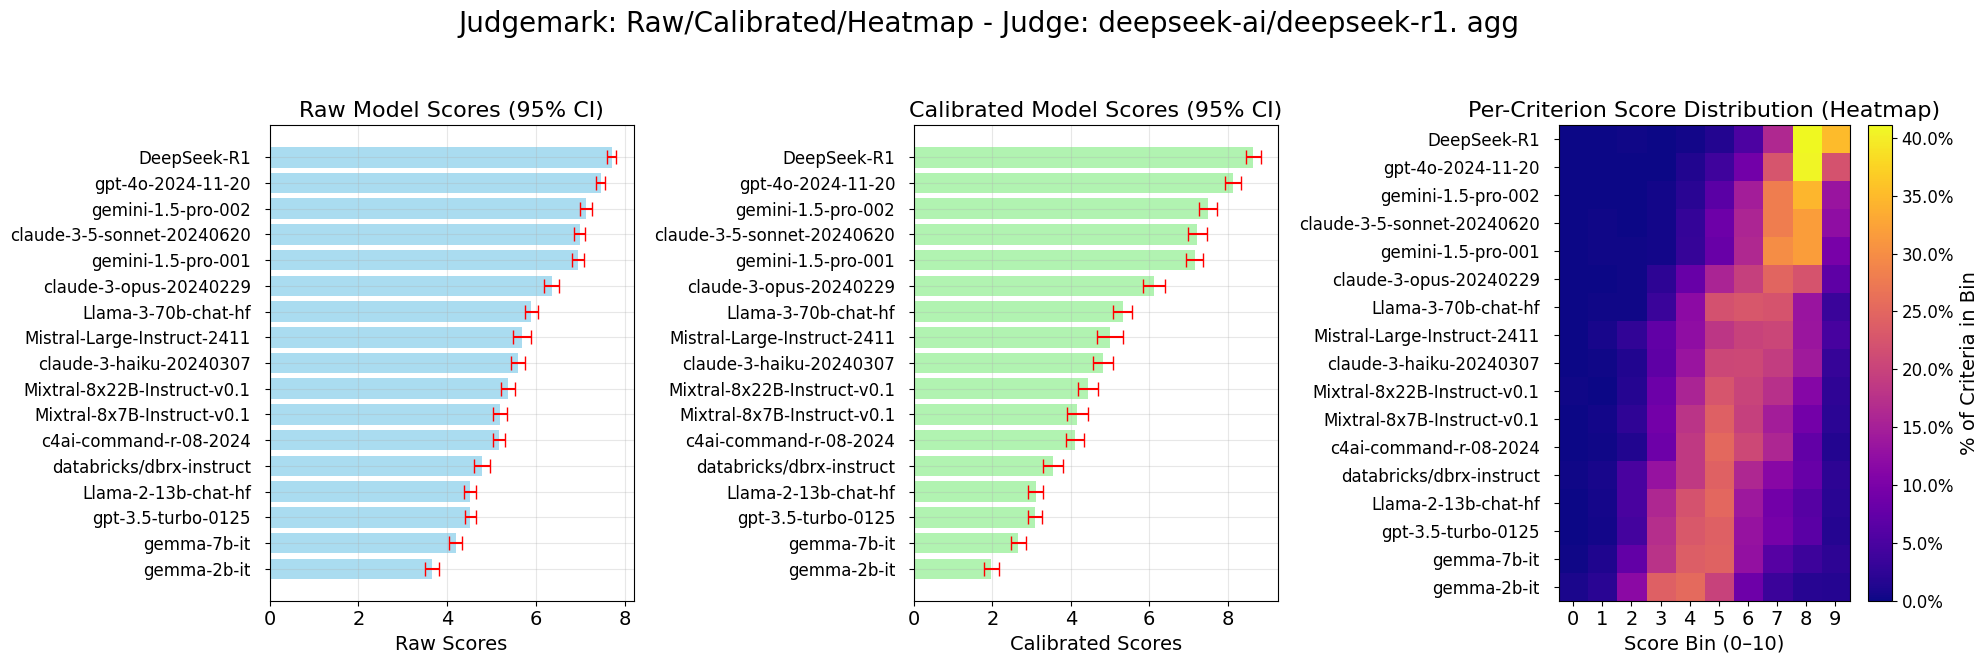

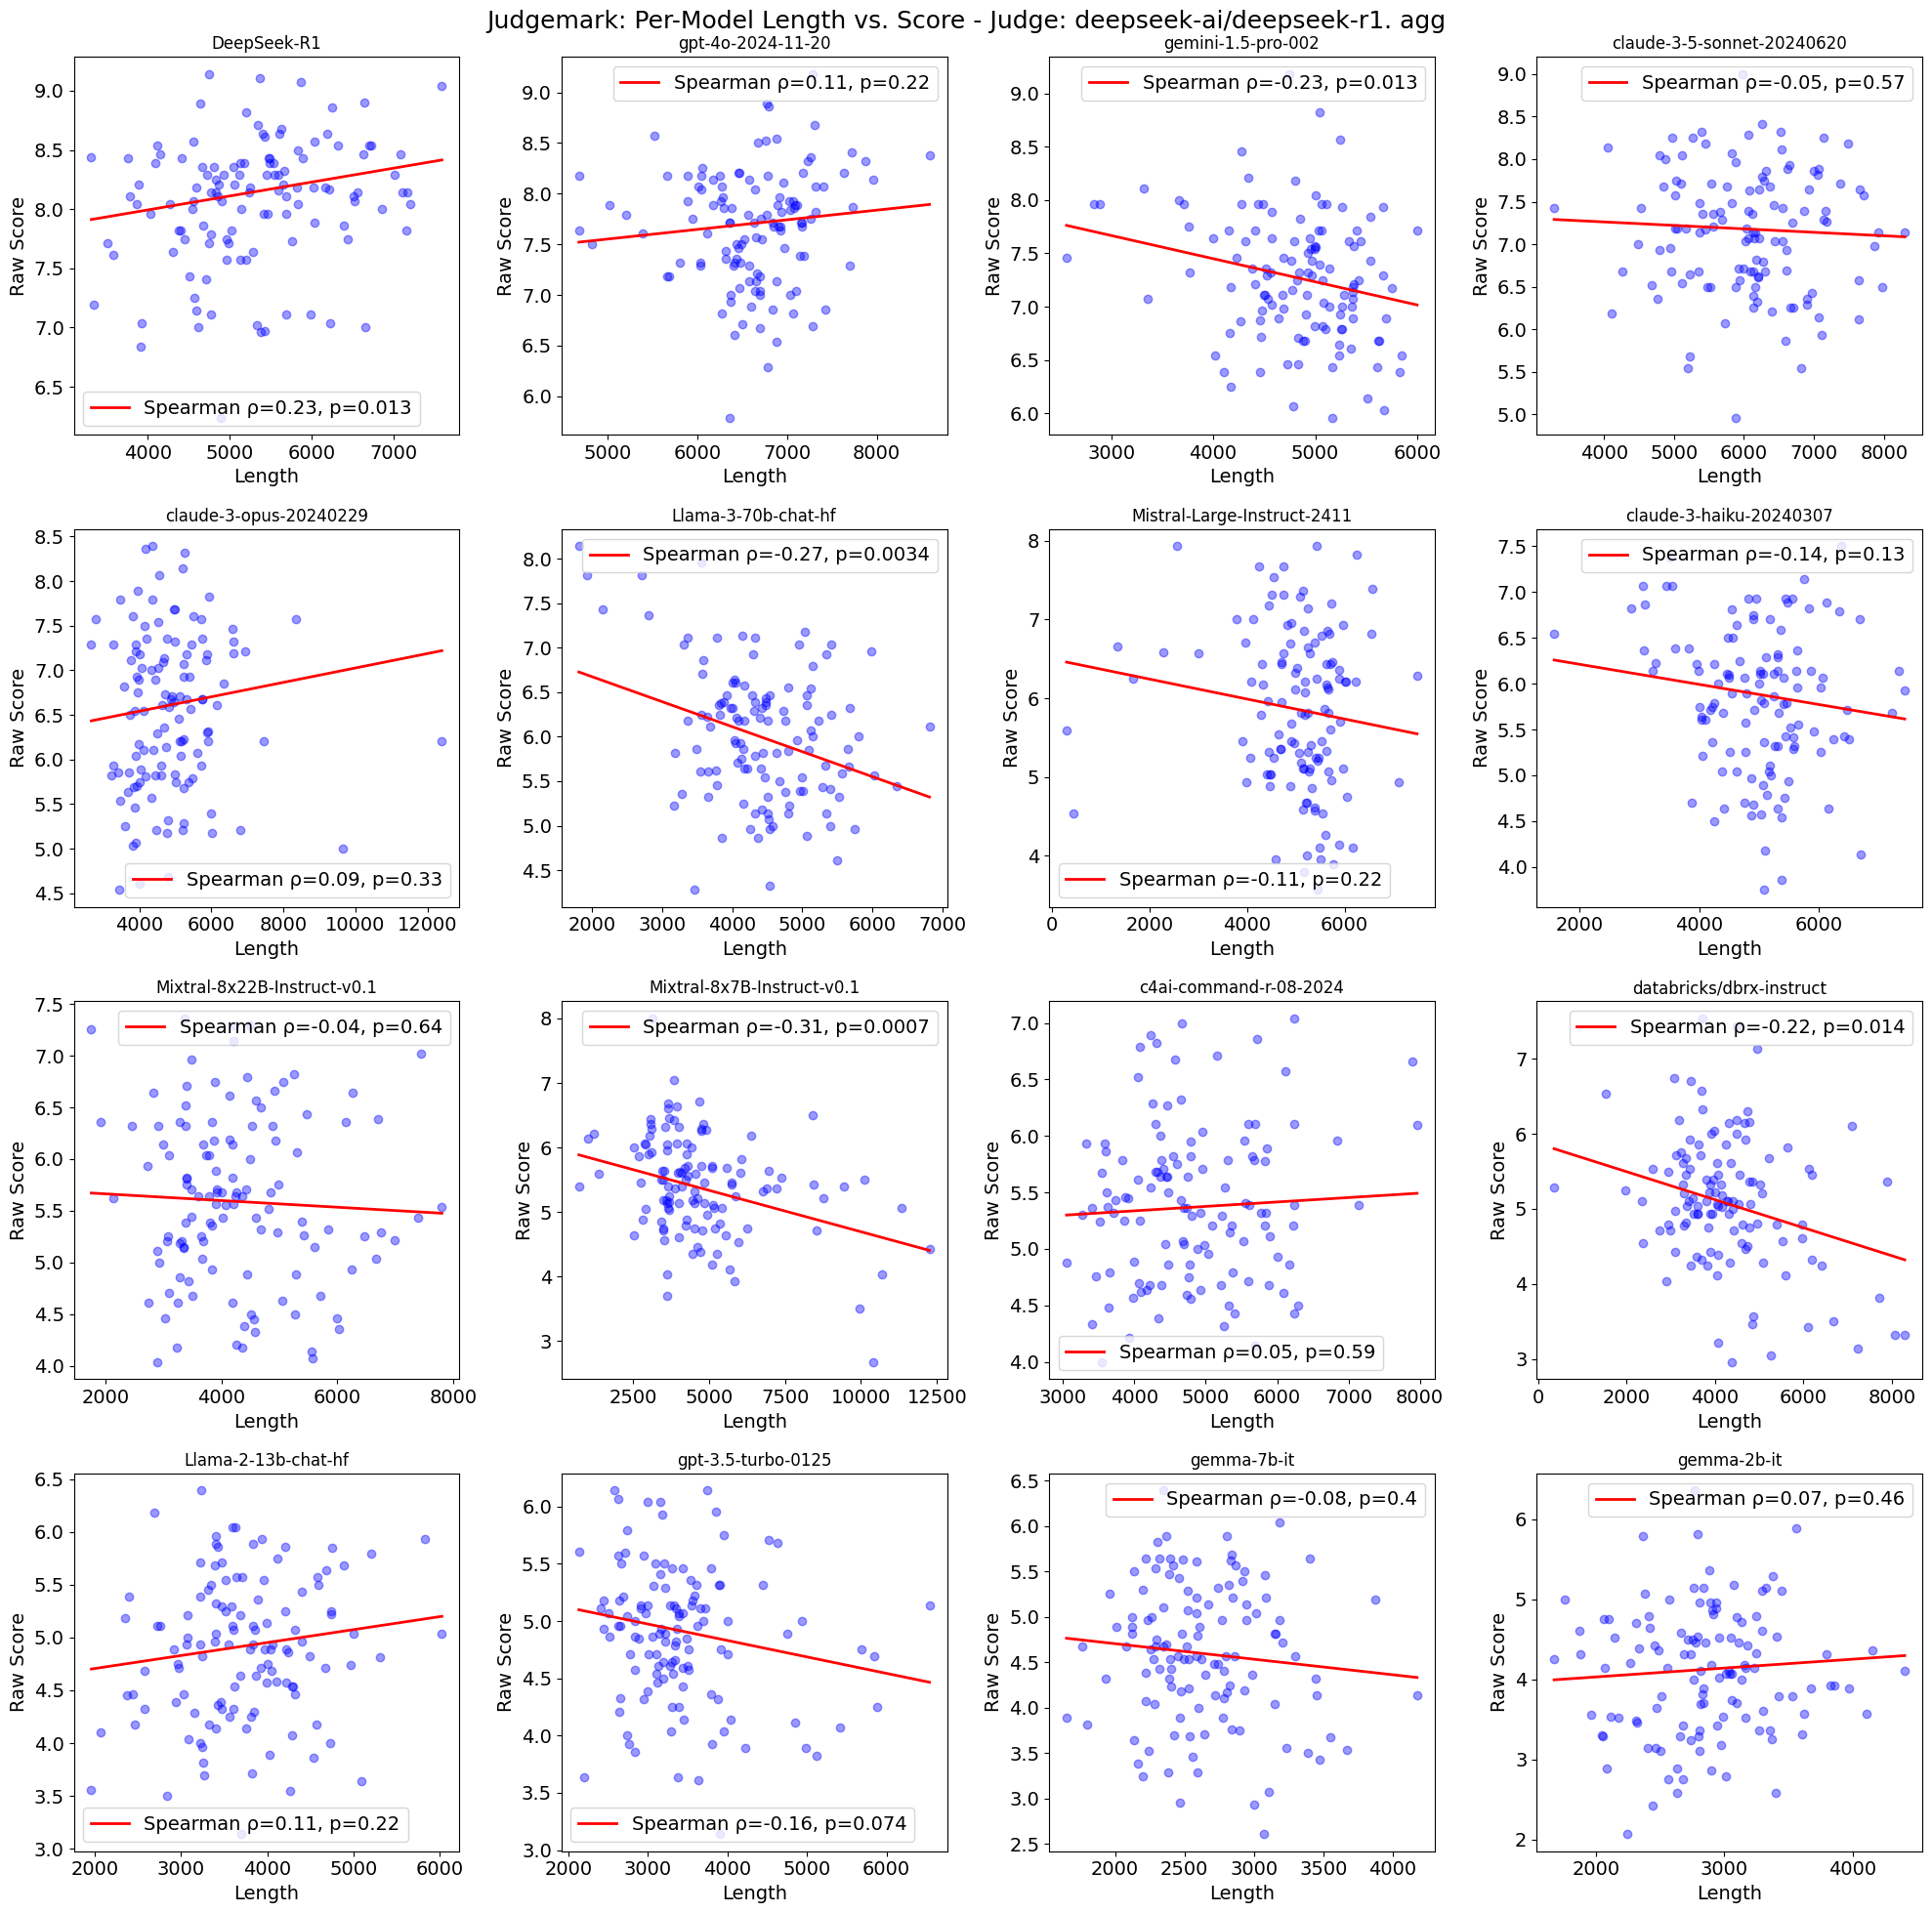




------- RAW SCORES Summary -------
ANOVA F-value: 269.2827, p=0.0000
Kruskal-Wallis: 1390.4241, p=0.0000
Pearson r=0.9631
Kendall τ=0.8941
Std.Dev across models: 1.1764

Model Scores:
DeepSeek-R1............................. 7.700 ±0.100
gpt-4o-2024-11-20....................... 7.451 ±0.106
gemini-1.5-pro-002...................... 7.121 ±0.129
claude-3-5-sonnet-20240620.............. 6.979 ±0.127
gemini-1.5-pro-001...................... 6.940 ±0.124
claude-3-opus-20240229.................. 6.350 ±0.164
Llama-3-70b-chat-hf..................... 5.893 ±0.145
Mistral-Large-Instruct-2411............. 5.682 ±0.199
claude-3-haiku-20240307................. 5.593 ±0.152
Mixtral-8x22B-Instruct-v0.1............. 5.357 ±0.158
Mixtral-8x7B-Instruct-v0.1.............. 5.182 ±0.164
c4ai-command-r-08-2024.................. 5.166 ±0.133
databricks/dbrx-instruct................ 4.781 ±0.173
gpt-3.5-turbo-0125...................... 4.522 ±0.121
Llama-2-13b-chat-hf..................... 4.512 ±0.135
gem

In [9]:
results['ranked'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked")

## Norm logprob




--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.750
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
5.136
CI99 Overlap pct: 
0.595
Avg. |Cohen's d| for adjacent pairs: 0.263
Average EMD across all pairs: 0.797
Avg. CI95 half-width: 0.120 (modulated: 0.871)




--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.750
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 
12.233
CI99 Overlap pct: 
0.610
Avg. |Cohen's d| for adjacent pairs: 0.238
Average EMD across all pairs: 1.878
Avg. CI95 half-width: 0.282 (modulated: 0.441)



This one uses normalised logprobs to compute the ranked score


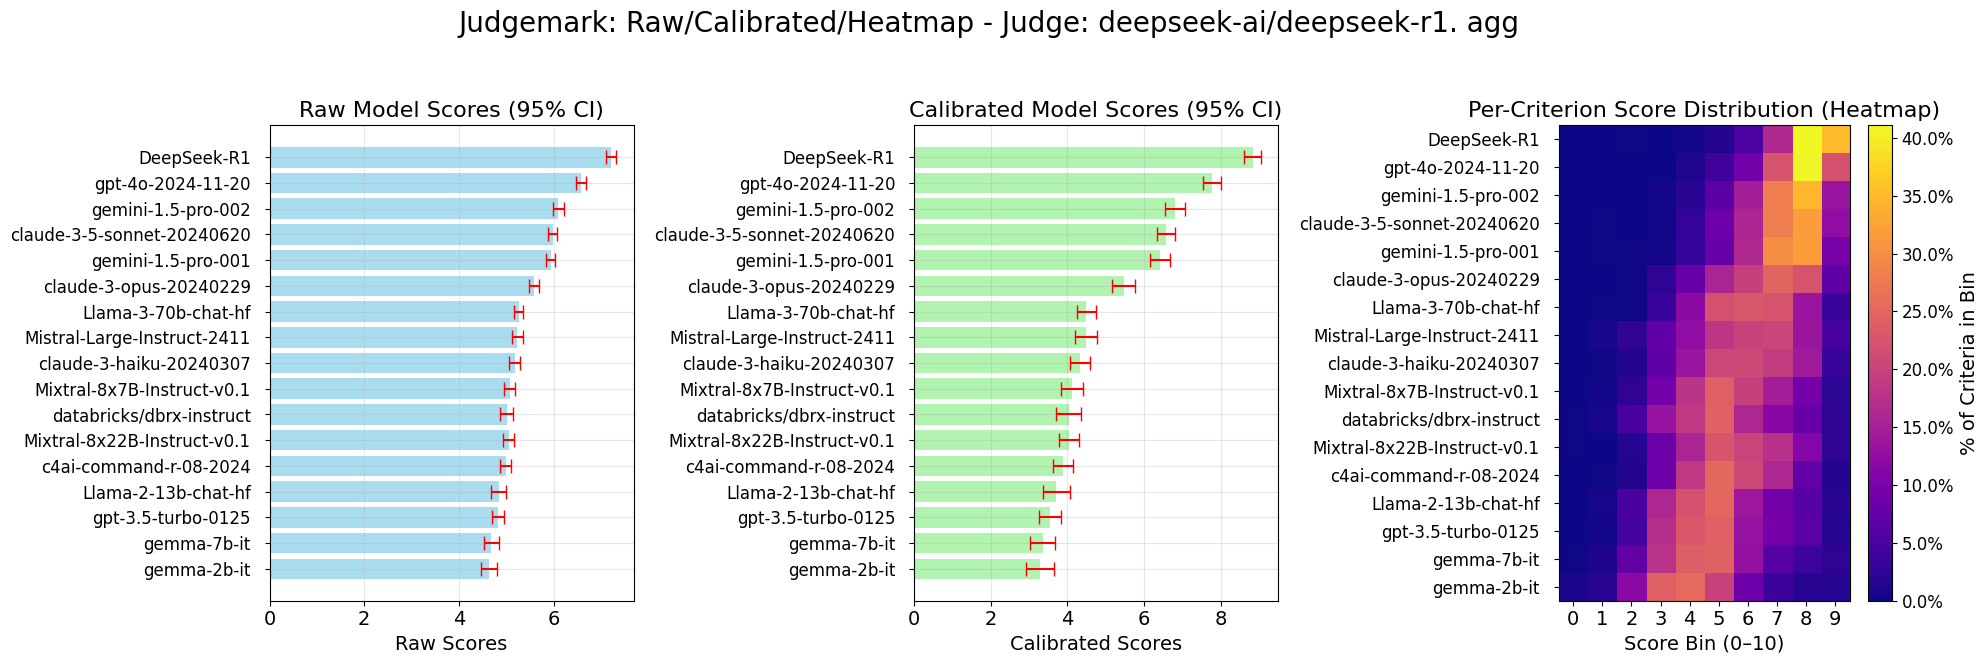

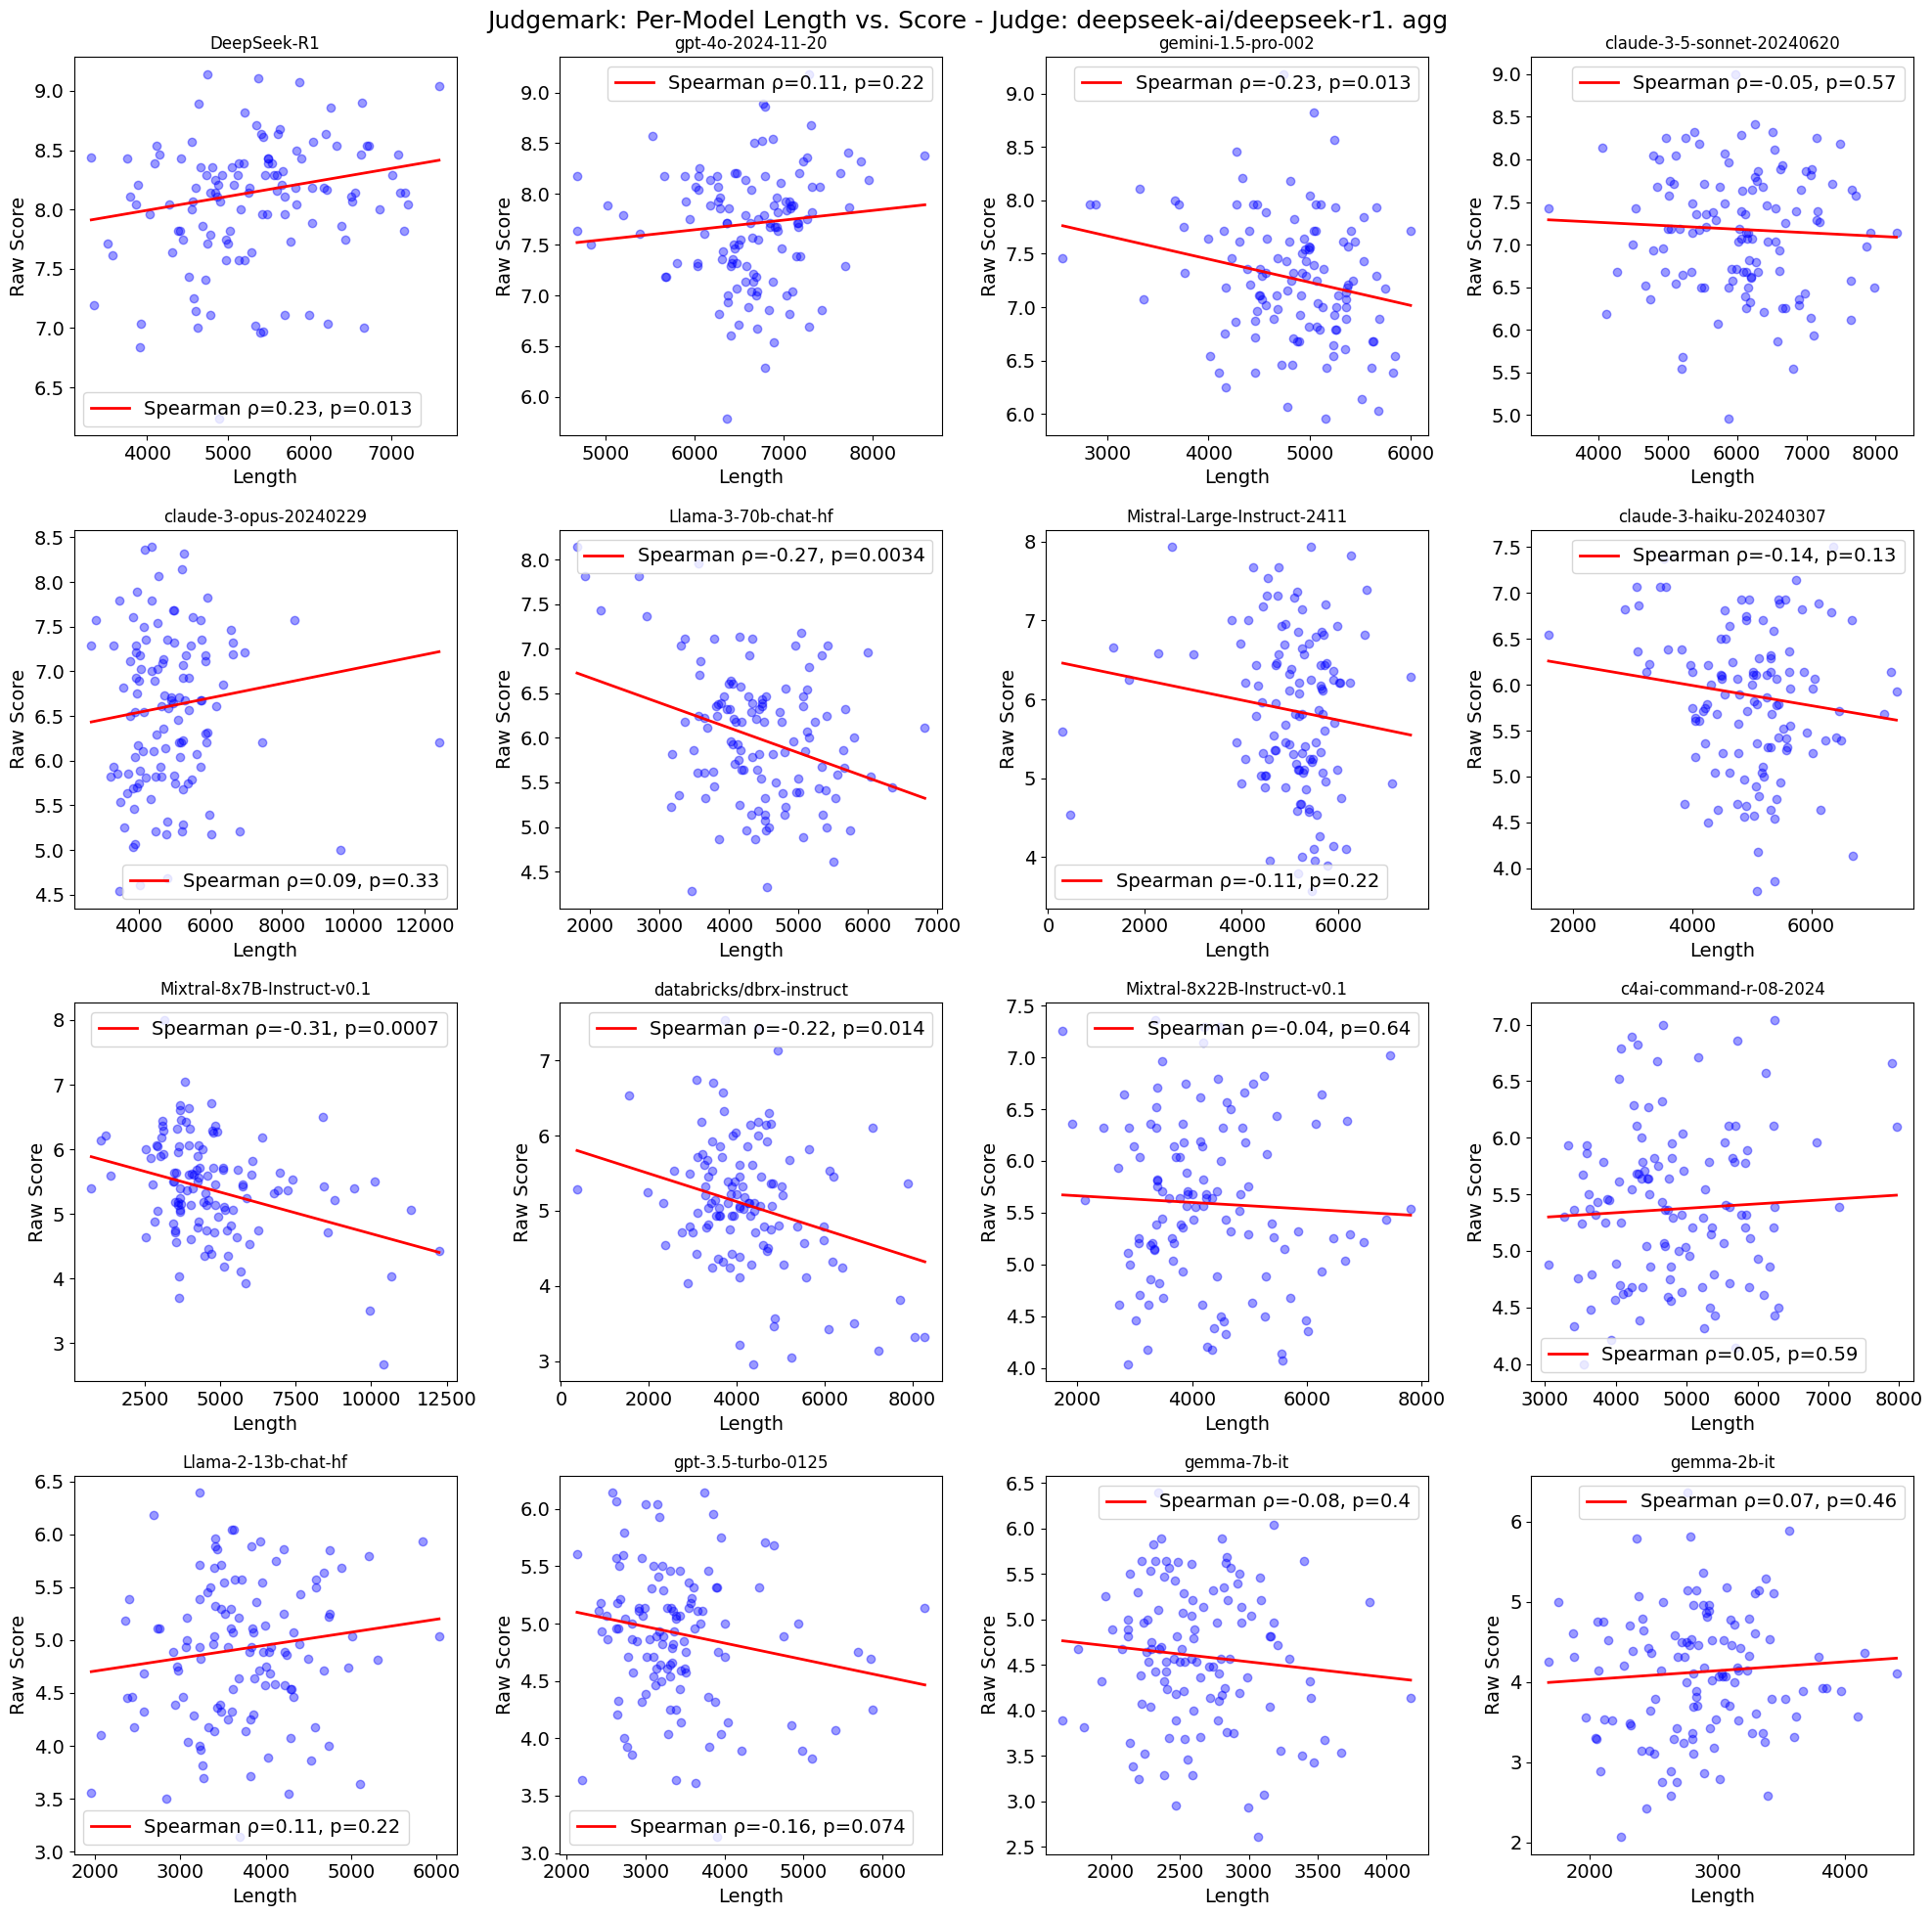




------- RAW SCORES Summary -------
ANOVA F-value: 131.9142, p=0.0000
Kruskal-Wallis: 1003.7739, p=0.0000
Pearson r=0.9354
Kendall τ=0.8353
Std.Dev across models: 0.6941

Model Scores:
DeepSeek-R1............................. 7.202 ±0.113
gpt-4o-2024-11-20....................... 6.579 ±0.106
gemini-1.5-pro-002...................... 6.096 ±0.108
claude-3-5-sonnet-20240620.............. 5.976 ±0.091
gemini-1.5-pro-001...................... 5.934 ±0.098
claude-3-opus-20240229.................. 5.585 ±0.102
Llama-3-70b-chat-hf..................... 5.257 ±0.097
Mistral-Large-Instruct-2411............. 5.224 ±0.115
claude-3-haiku-20240307................. 5.174 ±0.112
Mixtral-8x7B-Instruct-v0.1.............. 5.068 ±0.121
Mixtral-8x22B-Instruct-v0.1............. 5.045 ±0.119
databricks/dbrx-instruct................ 5.003 ±0.141
c4ai-command-r-08-2024.................. 4.983 ±0.121
Llama-2-13b-chat-hf..................... 4.836 ±0.154
gpt-3.5-turbo-0125...................... 4.824 ±0.129
gem

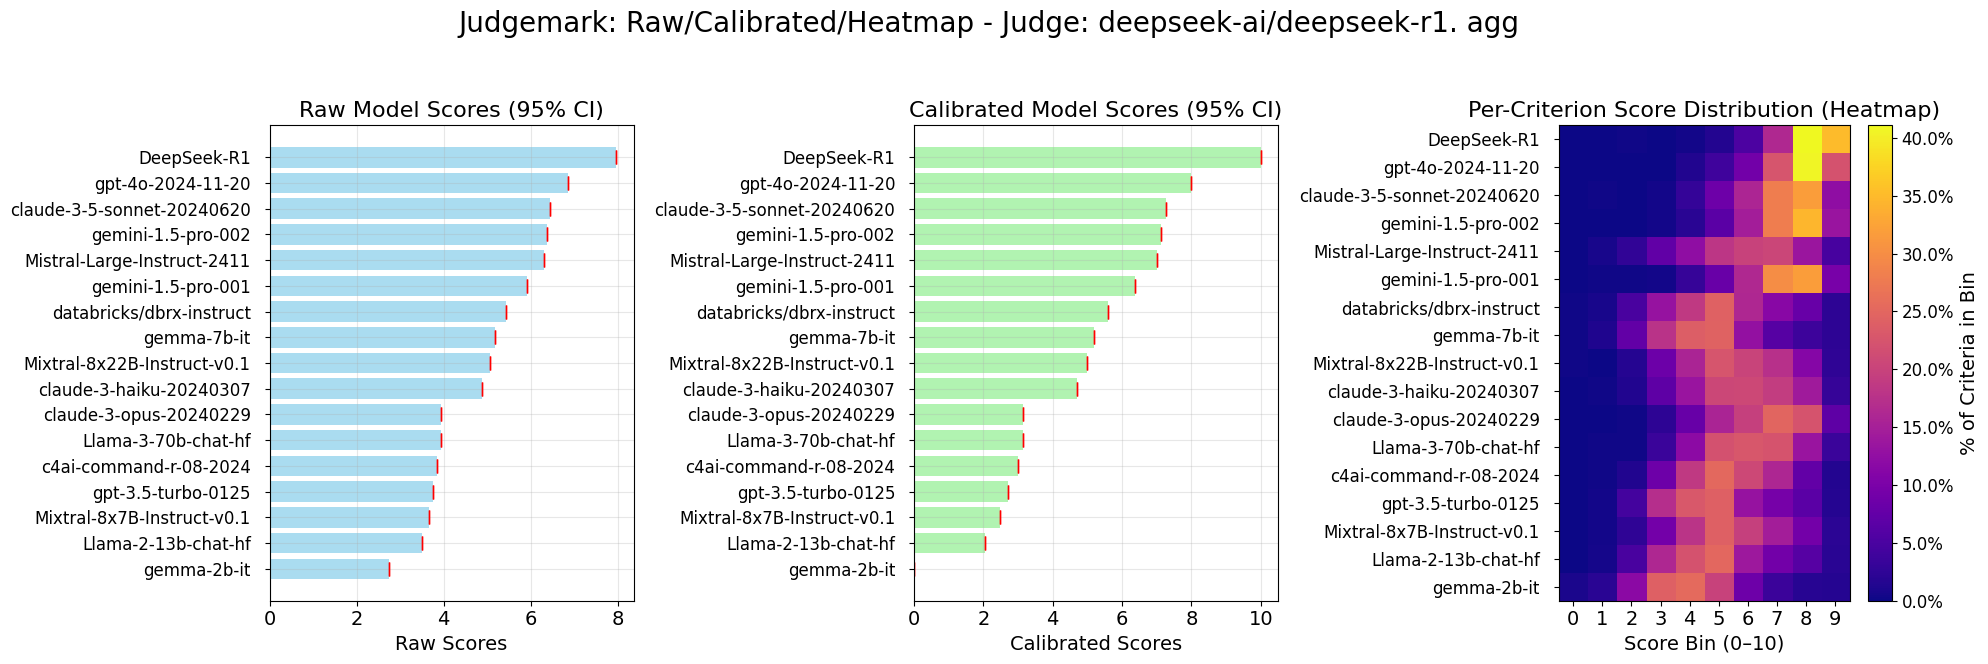

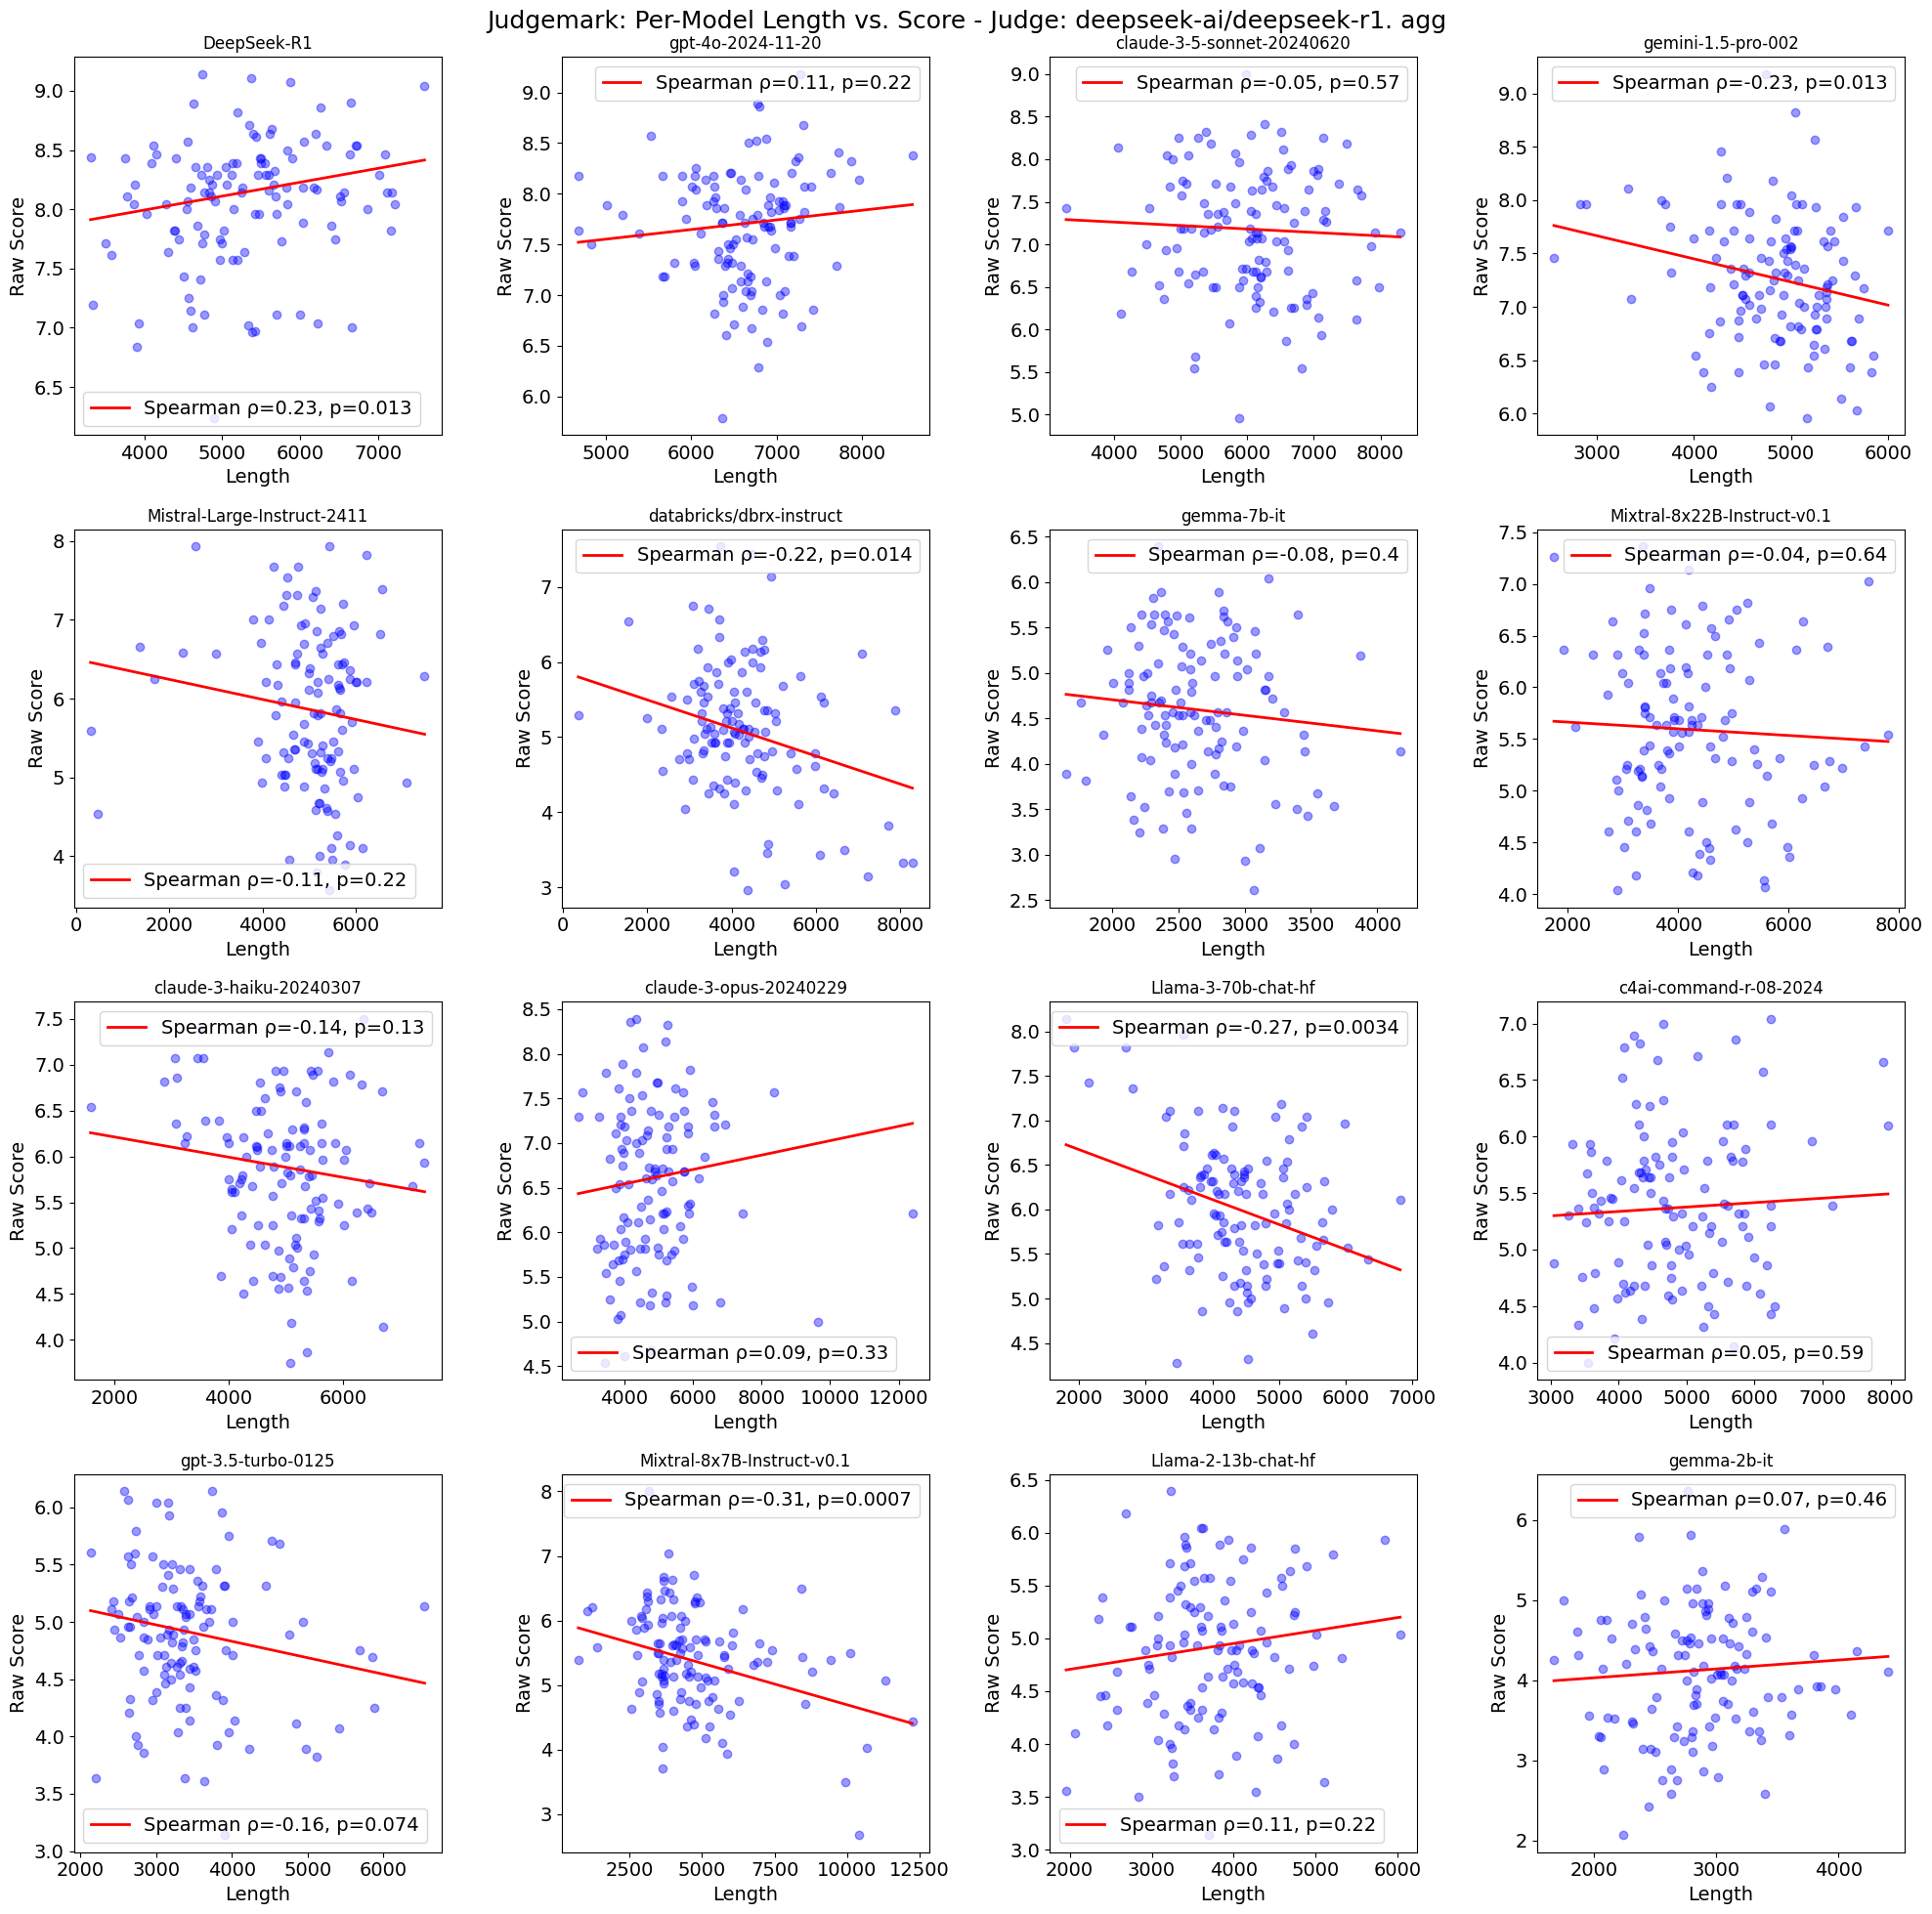




------- RAW SCORES Summary -------
ANOVA F-value: inf, p=0.0000
Kruskal-Wallis: 2039.0000, p=0.0000
Pearson r=0.7966
Kendall τ=0.6324
Std.Dev across models: 1.3992

Model Scores:
DeepSeek-R1............................. 7.970 ±0.000
gpt-4o-2024-11-20....................... 6.860 ±0.000
claude-3-5-sonnet-20240620.............. 6.450 ±0.000
gemini-1.5-pro-002...................... 6.380 ±0.000
Mistral-Large-Instruct-2411............. 6.310 ±0.000
gemini-1.5-pro-001...................... 5.930 ±0.000
databricks/dbrx-instruct................ 5.440 ±0.000
gemma-7b-it............................. 5.190 ±0.000
Mixtral-8x22B-Instruct-v0.1............. 5.080 ±0.000
claude-3-haiku-20240307................. 4.890 ±0.000
claude-3-opus-20240229.................. 3.950 ±0.000
Llama-3-70b-chat-hf..................... 3.940 ±0.000
c4ai-command-r-08-2024.................. 3.860 ±0.000
gpt-3.5-turbo-0125...................... 3.750 ±0.000
Mixtral-8x7B-Instruct-v0.1.............. 3.670 ±0.000
Llama-2-

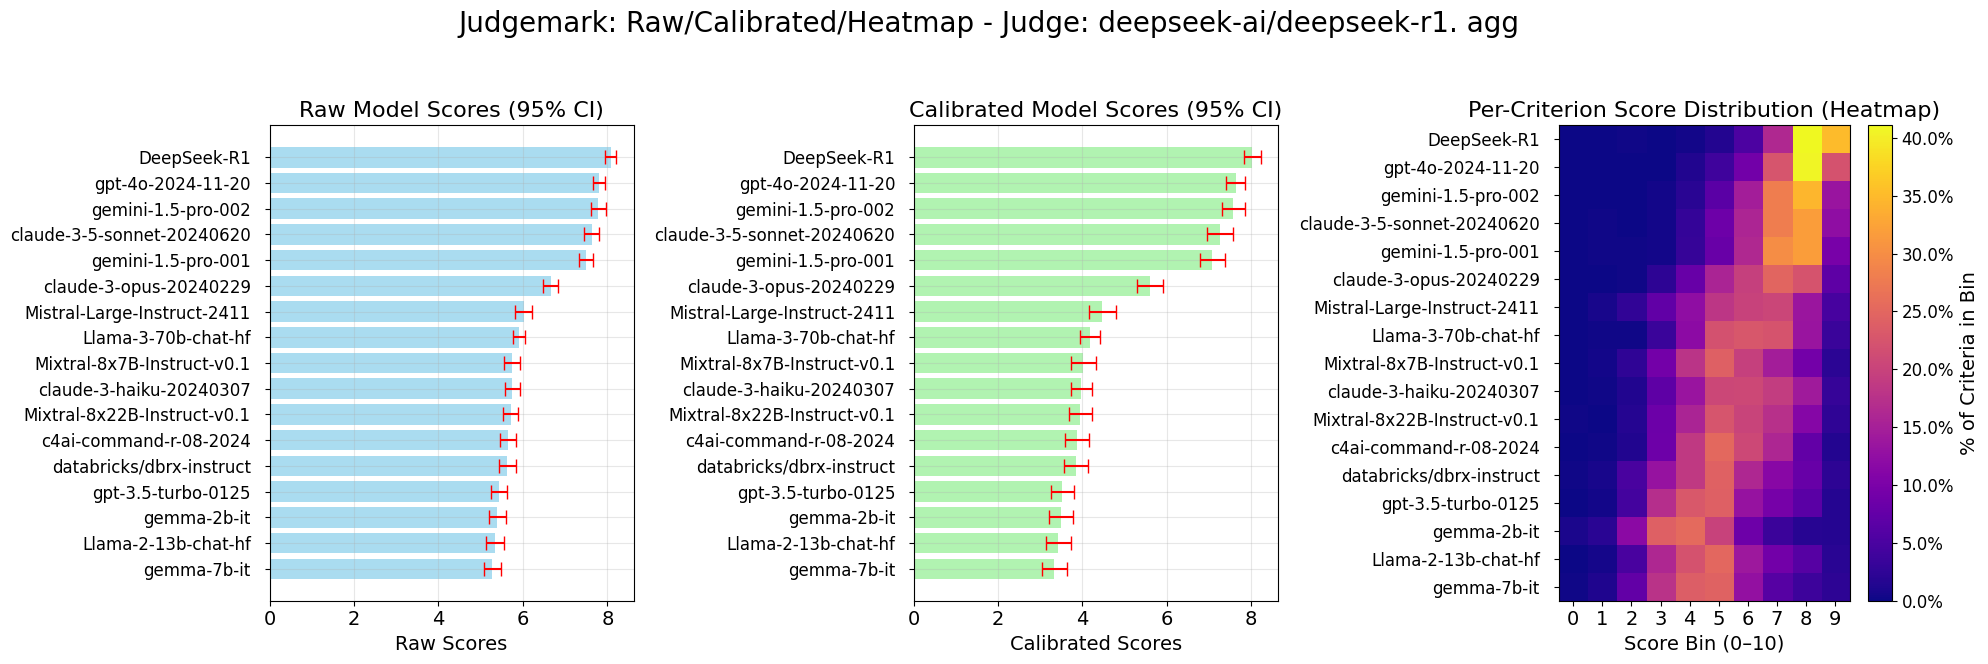

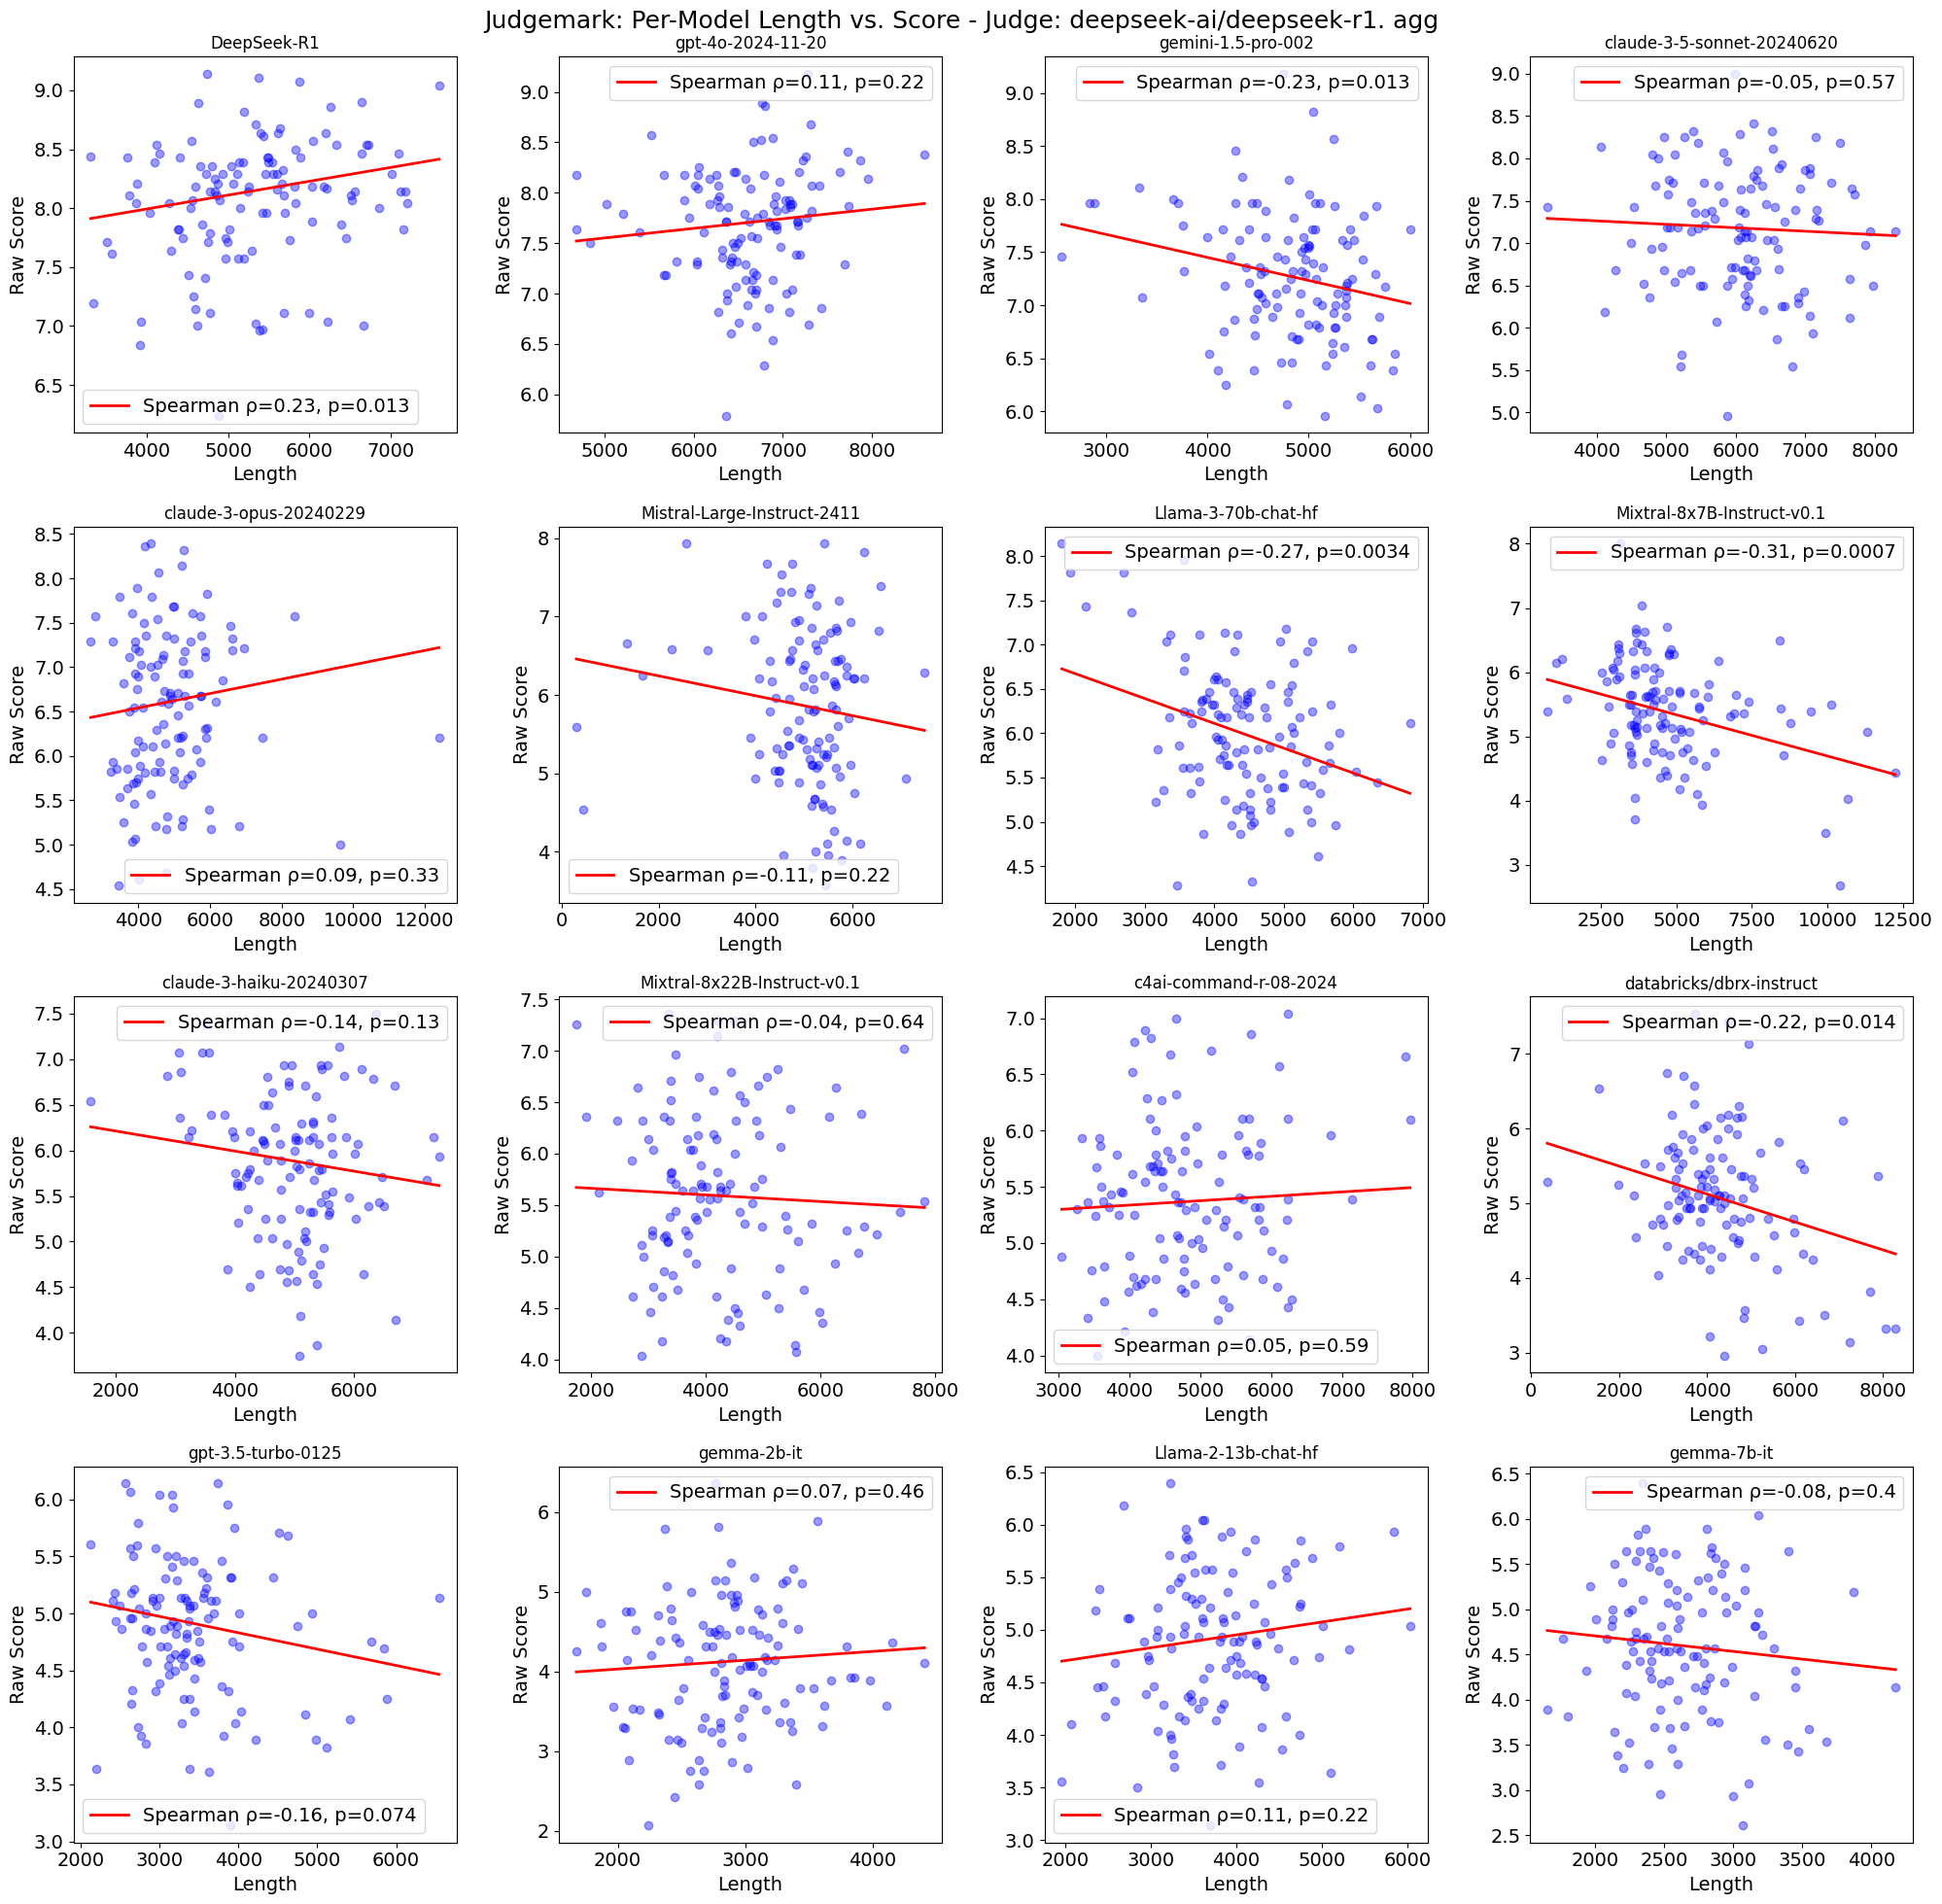




------- RAW SCORES Summary -------
ANOVA F-value: 120.8423, p=0.0000
Kruskal-Wallis: 1059.1234, p=0.0000
Pearson r=0.8972
Kendall τ=0.7853
Std.Dev across models: 0.9867

Model Scores:
DeepSeek-R1............................. 8.076 ±0.132
gpt-4o-2024-11-20....................... 7.802 ±0.144
gemini-1.5-pro-002...................... 7.783 ±0.174
claude-3-5-sonnet-20240620.............. 7.626 ±0.185
gemini-1.5-pro-001...................... 7.493 ±0.175
claude-3-opus-20240229.................. 6.654 ±0.175
Mistral-Large-Instruct-2411............. 6.017 ±0.195
Llama-3-70b-chat-hf..................... 5.899 ±0.145
claude-3-haiku-20240307................. 5.750 ±0.173
Mixtral-8x7B-Instruct-v0.1.............. 5.739 ±0.190
Mixtral-8x22B-Instruct-v0.1............. 5.713 ±0.181
c4ai-command-r-08-2024.................. 5.650 ±0.189
databricks/dbrx-instruct................ 5.626 ±0.198
gpt-3.5-turbo-0125...................... 5.427 ±0.190
gemma-2b-it............................. 5.396 ±0.194
Lla

In [10]:
for model_name in (run['results'].keys()):
    logprobs = []
    for iteration_key in (run['results'][model_name].keys()):
        for item_id in (run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp = storage_dict['logp']
            lpv = list(logp.values())
            if len(lpv) == 0:
                continue
            logprobs.append(np.stack(lpv))
    
    logprobs2 = np.concatenate(logprobs)
    log_prob_mean = logprobs2.mean(0)

    for iteration_key in (run['results'][model_name].keys()):
        for item_id in (run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp_norm = {k: v - log_prob_mean for i, (k, v) in enumerate(storage_dict['logp'].items())}

            def store_or_delete(storage_dict, key, value):
                if value is not None:
                    assert np.isfinite(value), f"Score for {model_name} {iteration_key} {item_id} is not finite: {value}"
                    storage_dict[key] = value
                elif key in storage_dict:
                    del storage_dict[key]

            extracted_rscores_norm = compute_ranked_score(logp_norm)
            ranked_score_norm = compute_raw_score(extracted_rscores_norm)
            store_or_delete(storage_dict, "aggregated_score_ranked_norm", ranked_score_norm)

            extracted_rscores = compute_ranked_score(logp)
            ranked_score = compute_raw_score(extracted_rscores)
            store_or_delete(storage_dict, "aggregated_score_ranked", ranked_score)

            extracted_wscore = compute_weighted_score(logp_norm)
            weighted_score_norm = compute_raw_score(extracted_wscore)
            store_or_delete(storage_dict, "aggregated_score_weighted_norm", weighted_score_norm)

            # extracted_scores, logp = parse_scores('', logp_norm)
            # extracted_raw_score_norm = compute_raw_score(extracted_scores)
            # raw_score_norm = extracted_raw_score_norm
            # store_or_delete(storage_dict, "aggregated_score_raw_norm", raw_score_norm)

            run['results'][model_name][iteration_key][item_id] = storage_dict

runs[run_id] = run

print('This one uses normalised logprobs to compute the ranked score')
results['ranked_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked_norm", do_plot=1)

results['ranked_scaled'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked", do_plot=1)

# results['raw_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_raw_norm", do_plot=1)

results['weighted_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_weighted_norm", do_plot=1)

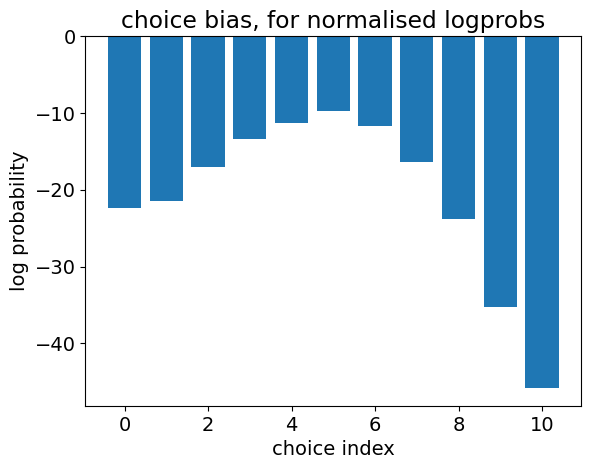

In [11]:
from matplotlib import pyplot as plt
plt.bar(range(11), log_prob_mean)
plt.title('choice bias, for normalised logprobs')
plt.xlabel('choice index')
plt.ylabel('log probability')
plt.show()

In [12]:
import polars as pl
results

{'published': {'judgemark_score_calib': 0.761,
  'stability_calib': 0.894,
  'separability_calib': 0.691,
  'human_correlation_calib': 0.908},
 'weighted': {'judgemark_score': np.float64(0.6646378651249002),
  'judgemark_score_calib': np.float64(0.7158490221749018),
  'stability': np.float64(0.892941176470588),
  'stability_calib': np.float64(0.8858333333333331),
  'separability': np.float64(0.5531332682755856),
  'separability_calib': np.float64(0.6333609515630062),
  'human_correlation': np.float64(0.8823529411764706),
  'human_correlation_calib': np.float64(0.8758169934640523)},
 'raw': {'judgemark_score': np.float64(0.6747346227167408),
  'judgemark_score_calib': np.float64(0.7311932881027845),
  'stability': np.float64(0.892941176470588),
  'stability_calib': np.float64(0.8946176470588234),
  'separability': np.float64(0.5674614111992943),
  'separability_calib': np.float64(0.6525472850953532),
  'human_correlation': np.float64(0.8856209150326798),
  'human_correlation_calib': np.

In [13]:
# More efficient Polars approach - create DataFrame directly from data
data = [
    {"name": k, **v}
    for k, v in results.items()
]
df = pl.DataFrame(data)
df

shape: (7, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ name      ┆ judgemark ┆ stability ┆ separabil ┆ … ┆ judgemark ┆ stability ┆ separabil ┆ human_co │
│ ---       ┆ _score_ca ┆ _calib    ┆ ity_calib ┆   ┆ _score    ┆ ---       ┆ ity       ┆ rrelatio │
│ str       ┆ lib       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ n        │
│           ┆ ---       ┆ f64       ┆ f64       ┆   ┆ f64       ┆           ┆ f64       ┆ ---      │
│           ┆ f64       ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ published ┆ 0.761     ┆ 0.894     ┆ 0.691     ┆ … ┆ null      ┆ null      ┆ null      ┆ null     │
│ weighted  ┆ 0.715849  ┆ 0.885833  ┆ 0.633361  ┆ … ┆ 0.664638  ┆ 0.892941  ┆ 0.553133  ┆ 0.882353 │
│ raw       ┆ 0.731193  ┆ 0.894618  ┆ 0.652547  ┆ … ┆ 0.674735  ┆ 0.892941  ┆ 0.567461  ┆ 0.885621 │
│ ranked    ┆ 0.739551  ┆ 0.895142  ┆ 0.664953  ┆ … ┆ 0.675775  ┆ 0.892495  ┆ 0.56995   ┆ 0.882353 │
│ ranked_no ┆ 0.574825  ┆ 0.644152  ┆ 0.505938  ┆ … ┆ 0.569093  ┆ 0.892392  ┆ 0.426293  ┆ 0.816993 │
│ rm        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ranked_sc ┆ 0.788381  ┆ 1.0       ┆ 0.784695  ┆ … ┆ 0.634149  ┆ 0.892618  ┆ 0.580193  ┆ 0.591503 │
│ aled      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ weighted_ ┆ 0.544804  ┆ 0.546907  ┆ 0.49012   ┆ … ┆ 0.557171  ┆ 0.893676  ┆ 0.421977  ┆ 0.761438 │
│ norm      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [14]:
from IPython.display import display, Markdown

# Round numeric columns and configure display for markdown
df_display = df.select([
    pl.col("name"),
    *[pl.col(c).round(3) for c in df.columns if c != "name" and df[c].dtype in [pl.Float64, pl.Float32]]
])

with pl.Config(
    tbl_formatting="MARKDOWN",
    tbl_hide_column_data_types=True,
    tbl_hide_dataframe_shape=True,
    tbl_width_chars=240,  # Allow wider table
    tbl_cols=-1,  # Show all columns
) as cfg:
    print(df_display)

| name          | judgemark_score_calib | stability_calib | separability_calib | human_correlation_calib | judgemark_score | stability | separability | human_correlation |
|---------------|-----------------------|-----------------|--------------------|-------------------------|-----------------|-----------|--------------|-------------------|
| published     | 0.761                 | 0.894           | 0.691              | 0.908                   | null            | null      | null         | null              |
| weighted      | 0.716                 | 0.886           | 0.633              | 0.876                   | 0.665           | 0.893     | 0.553        | 0.882             |
| raw           | 0.731                 | 0.895           | 0.653              | 0.882                   | 0.675           | 0.893     | 0.567        | 0.886             |
| ranked        | 0.74                  | 0.895           | 0.665              | 0.882                   | 0.676           | 0.892     | 0.5

In [15]:
# import polars as pl
# # pd.DataFrame([r1, r2, r3]).rename(columns={0: "raw", 1: "weighted", 2: "ranked"}).round(3)
# df = pl.DataFrame([r1, r2, r3, r3_n]).rename({"final_judgemark_score_raw": "raw", "final_judgemark_score_calibrated": "weighted"})
# df = df.with_columns(names=pl.lit(pl.Series(["raw", "weighted", "ranked", "ranked_normalized"])))
# # df.style
# print(df)

## Choose best of multiple combinations of choices

In [16]:
# TODO try all ordered subset of choices
choices = np.arange(11).tolist()  # Choices are 0-10

# even numbers are 0, 2, 4, 6, 8, 10
# odd numbers are 1, 3, 5, 7, 9

import itertools
popular_perms = [choices]
choices_even = [c for c in choices if c % 2 == 0]
choices_odd = [c for c in choices if c % 2 != 0]
for i in range(3, 6):
    popular_perms += list(itertools.combinations(choices_even, i))
    popular_perms += list(itertools.combinations(choices_odd, i))
print(f"Total combinations: {len(popular_perms)}")


choice_perms = []
for i in range(3, 12):
    choice_perms += list(itertools.combinations(choices, i))
len(choice_perms)

# now only keep the choices with middle numbers, and even values
middle_choices = [c for c in choices if c % 2 == 0]
filtered_perms = [p for p in choice_perms if all(x in middle_choices for x in p)]
len(choice_perms), len(middle_choices), len(filtered_perms)

Total combinations: 58


(1981, 6, 42)

In [ ]:
from scipy.stats import kendalltau


def normed_kendalltau(res, choices, use_pvalue=True):
    wc = res.correlation 
    if use_pvalue:
        wc *=  (1 - res.pvalue)
    rng = max(choices) - min(choices)
    decision_norm = wc * 2 - 1
    decision_scaled = decision_norm * rng + min(choices)
    return decision_scaled

def compute_ranked_score2(logp):
    outs = {}
    for metric, logp_arr in logp.items():
        best = None
        best_choices = None
        for choices in popular_perms:
            logp_arr_subset = [logp_arr[i] for i in choices]
            res = kendalltau(choices, logp_arr_subset, variant='b')
            v = normed_kendalltau(res, choices)
            if best is None:
                best = v
                best_choices = choices
                best_res = res
            if res.pvalue < 0.3 and v > best:
                best = v
                best_choices = choices
                best_res = res

        # scale my max and min value in choices
        v = normed_kendalltau(best_res, best_choices, use_pvalue=False)


        # decision = (best+1)*5 # scale to 0-10
        # decision = (2*decision*res.pvalue).clip(0, 10)
        if hasattr(v, 'item'):
            v = v.item()
        outs[metric] = v

    return outs

# compute_ranked_score2(logp)
# 6 mins
for model_name in tqdm(run['results'].keys()):
    for iteration_key in tqdm(run['results'][model_name].keys()):
        for item_id in tqdm(run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp = storage_dict['logp']
            extracted_rscores = compute_ranked_score2(logp)
            ranked_score = compute_raw_score(extracted_rscores)
            if 'aggregated_score_ranked' in storage_dict:
                del storage_dict["aggregated_score_ranked"]
            if ranked_score is not None:
                assert np.isfinite(ranked_score), f"Ranked score for {model_name} {iteration_key} {item_id} is not finite: {ranked_score}"
                storage_dict["aggregated_score_ranked"] = ranked_score

            run['results'][model_name][iteration_key][item_id] = storage_dict

runs[run_id] = run

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:

print('This one uses normalised logprobs to compute the ranked score')
results['ranked_combinations'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked")

# Other

In [ ]:
results